<a href="https://colab.research.google.com/github/prasadwagh2503/Cardiovascular-Risk-Prediction/blob/main/Prasad_lastcut_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular_Risk_Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual = **Prasad Wagh**


# **Project Summary -**

***Coronary heart disease (CHD)*** is the most common type of heart disease, killing approximately ***382,820*** people annually. About 697,000 people die of heart disease in the United States every year–that's ***1 in every 5 deaths***.


The dataset is from an ongoing cardiovascular study on residents of the town of ***Framingham, Massachusetts***. It includes over ***4,000 records and 15 attributes***. Each attribute is a potential risk factor, including demographic, behavioral and medical risk factors. In order to ***predict whether the patient has a 10-year risk of future coronary heart disease (CHD)***, I followed following steps:



1.   I started with ***importing necessary libraries***, mounting drive and storing data in variables for deriving meaningful insights. Next step being ***data analysis and visualization***, where I analyzed our ***data distribution using an "UBM rule"*** i.e univariate, bivariate and multivariate plots. With the help of different plots, I tried to exploit ***meaningful insights*** from the dataset.
2.   Next, I perfomed ***hypothesis testing*** by testing 3 different hypotheses. In order to make data ready for the model training, I did ***feature engineering and data pre-processing***. I ***handled the null values*** by replacing them by appropriate ways(***Median/Mode***). I ***treated the mis-filled data*** from 'is_smoking' attribute. Then, to treat the ***outliers*** from several columns, I used ***Z score treatment***.
3. In order to get more accurate and better results, I did ***feature manipulation***. I created a new column ***'pulsePressure'*** with the help of two existing columns-'sysBP' and 'diaBP'. I deleted 'is_smoking' column and changed 'cigsPerDay' into a categorical column. For a better model training and prediction, I have ***encoded categorical feature values*** into binary values(i.e 0/1). Then with the help of ***Variance Inflation Factor and Correlation Heatmap***, I narrowed down the important features that were actually contributing to the predictions.
4. To feed the data into various algorithms, I ***splitted*** it into train(80%) and test(20%). Also, to ensure all features are on the similar scale, I used ***MinMaxScaler***. As our data was highly imbalanced, I used ***SMOTE*** to create a balanced data. 
5. Last step was to perform model training using different algorithms, I tried 5 different models viz., ***Logistic Regression Classifier, Random Forest Classifier, Gaussian Naive Bayes Classifier, XG Boost Classifier and K-Nearest Neighbors Classifier***. Being a dataset from medical domain, there is a high cost associated with ***False Negatives*** and hence to deal with this very issue, I chose ***'Recall' as the model metric*** to select the best machine learning model. ***K-Nearest Neighbors Classifier*** gave the best results both, before and after hyper-parameter tuning and cross-validation. ***Recall and precision of 0.88*** is decent and ***AUC of 0.884*** is pretty good. So I have finalised ***K-Nearest Neighbors Classifier*** as the best model for this particular dataset.


Overall, while building a machine learning model on this particular dataset, I applied combination of ***Data Processing, Machine Learning Techniques*** and ***Model Evaluation Skills***. It was a challenging task but with the right approach, I was able to ***successfully build a model*** that can predict whether the patient has a 10-year risk of future ***coronary heart disease (CHD)***.




# **GitHub Link -**

https://github.com/prasadwagh2503/Cardiovascular-Risk-Prediction

# **Problem Statement**


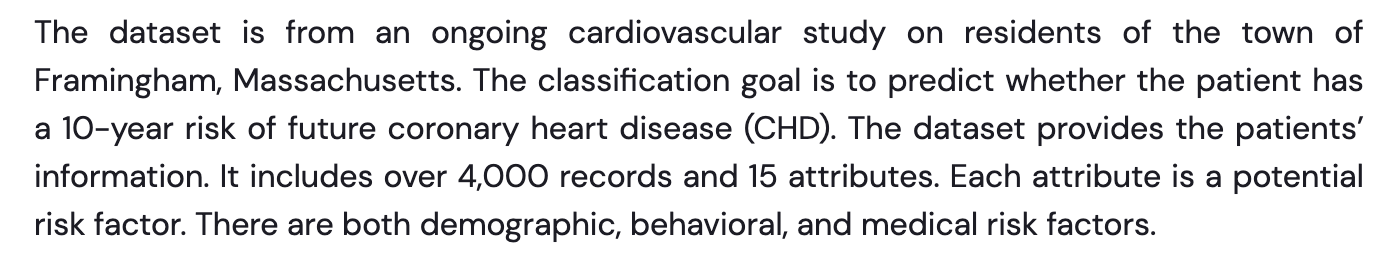

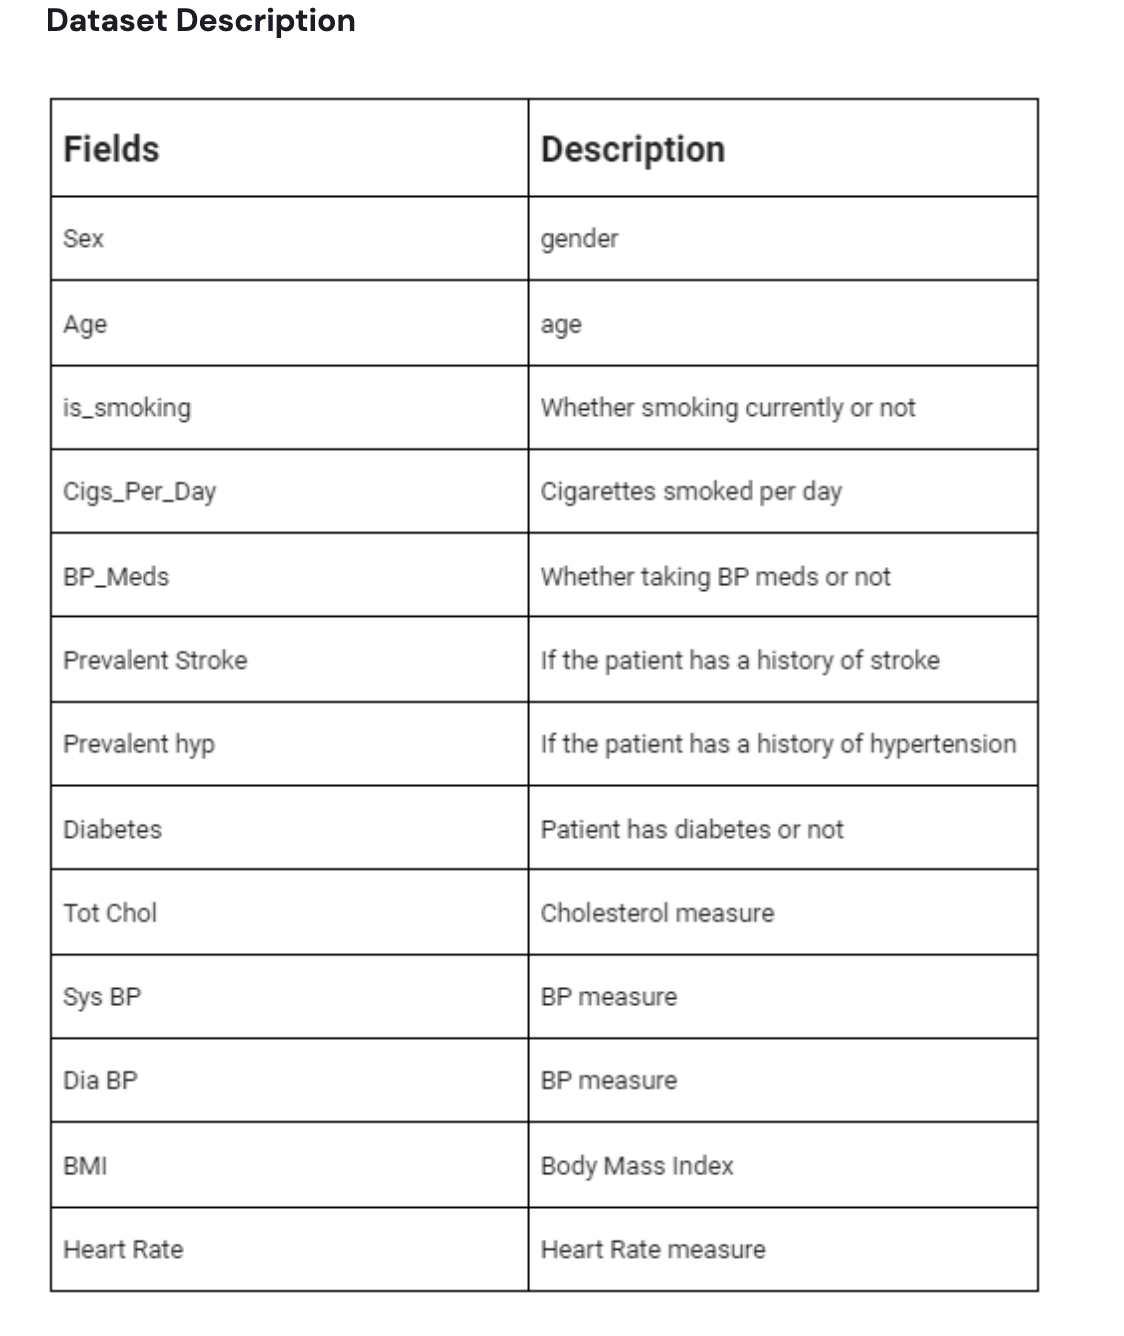

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***


*In order to design any model, one of the most important thing is to know your data. Here, we will load our data and take a first view of it. *

### Import Libraries

In [81]:
# Import Libraries


# # Importing libraries
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import tree




time: 1.7 ms (started: 2023-02-25 05:51:28 +00:00)


In [82]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics
!pip install scikit-learn
import sklearn
!pip install missingno
import missingno as msno
!pip install shap
import shap
shap.initjs()
!pip install scikit-plot
import warnings
warnings.filterwarnings("ignore")

# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 23.6 s (started: 2023-02-25 05:51:29 +00:00)


### Dataset Loading

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3 s (started: 2023-02-25 05:51:52 +00:00)


In [84]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone 3 : Classification/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

time: 26.8 ms (started: 2023-02-25 05:51:55 +00:00)


### Dataset First View

In [85]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

time: 34.4 ms (started: 2023-02-25 05:51:55 +00:00)


In [86]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

time: 25.2 ms (started: 2023-02-25 05:51:55 +00:00)


### Dataset Rows & Columns count

In [87]:
# Dataset Rows & Columns count
print(f"Rows={df.shape[0]}, Columns={df.shape[1]}") 

Rows=3390, Columns=17
time: 1.75 ms (started: 2023-02-25 05:51:56 +00:00)


### Dataset Information

In [88]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [89]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in the dataset: {df.duplicated().sum()}")

Number of duplicated rows in the dataset: 0
time: 13.2 ms (started: 2023-02-25 05:51:56 +00:00)


#### Missing Values/Null Values

In [90]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

time: 1.75 ms (started: 2023-02-25 05:51:56 +00:00)


In [91]:
Complete_columns_info(df)

 selected dataframe has 17 columns and 3390 rows


No of Null Values  % of null values  No of unique values  \
glucose                        304               9.0                  132   
education                       87               2.6                    4   
BPMeds                          44               1.3                    2   
totChol                         38               1.1                  240   
cigsPerDay                      22               0.6                   32   
BMI                             14               0.4                 1259   
heartRate                        1               0.0                   68   
id                               0               0.0                 3390   
diaBP                            0               0.0                  142   
sysBP                            0               0.0                  226   
prevalentHyp                     0               0.0                    2   
diabetes                         0               0.0                    2   
age                              0               0.0                   39   
prevalentStroke                  0               0.0                    2   
is_smoking                       0               0.0                    2   
sex                              0               0.0                    2   
TenYearCHD                       0               0.0                    2   

                Data Type  
glucose           float64  
education         float64  
BPMeds            float64  
totChol           float64  
cigsPerDay        float64  
BMI               float64  
heartRate         float64  
id                  int64  
diaBP             float64  
sysBP             float64  
prevalentHyp        int64  
diabetes            int64  
age                 int64  
prevalentStroke     int64  
is_smoking         object  
sex                object  
TenYearCHD          int64

time: 37.3 ms (started: 2023-02-25 05:51:56 +00:00)


<AxesSubplot:>

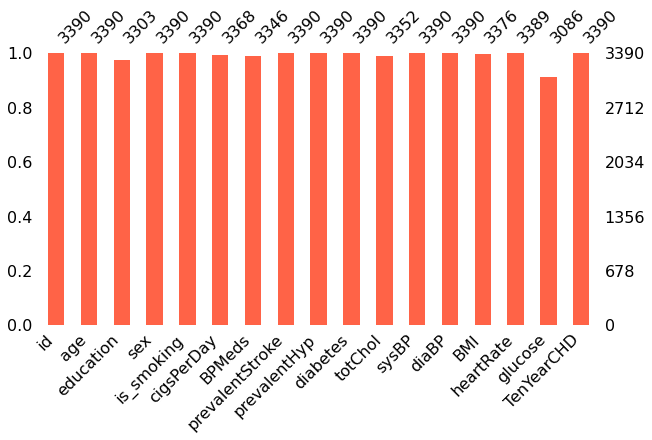

time: 1.52 s (started: 2023-02-25 05:51:56 +00:00)


In [92]:
# Visualizing the missing values

msno.bar(df,figsize=(10,5),color="tomato")

### What did you know about your dataset?

This datatset is from the ongoing study of ***Framingham city***. I am tasked to build a classification model which predicts if the patient has 10-year risk of CHD based on various attributes (habits/comorbidities).


1. The dataset has **3390 rows and 17 columns**.
1.   Our target variable is **'TenYearCHD'** and it contains no null values. ***Since the prediction can be 'Yes' or 'No', it is a classification problem***.
2.   Out of 17 columns, **7 attributes** are seen with null values- 'education', 'BPMeds', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'.
3. Two columns namely- **'sex' and 'is_smoking'** are having dtype as **object** while most of the other columns are of dtype **float**. 



## ***2. Understanding Your Variables***


*For any Machine Learning model, variables and their importance plays a vital role. Hence, 'Understanding Your Variables' is one of the most important step. This is another way of data exploration where we check the numerical columns, variable description and try to know a bit about our variables/data etc.*


In [93]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

time: 6.5 ms (started: 2023-02-25 05:51:57 +00:00)


In [94]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

time: 1.52 s (started: 2023-02-25 05:51:57 +00:00)


### Variables Description 




**Demographic**:

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

• Sex: male or female("M" or "F")

• Education: Person's educational background (1,2,3,4)



---





**Behavioral**: 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 


---

**Medical history:** 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 


---


**Current Medical Issues:**

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

---

**Target Variable:**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) 



### Check Unique Values for each variable.

In [95]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("Unique values in",i,":",df[i].nunique())

Unique values in id : 3390
Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigsPerDay : 32
Unique values in BPMeds : 2
Unique values in prevalentStroke : 2
Unique values in prevalentHyp : 2
Unique values in diabetes : 2
Unique values in totChol : 240
Unique values in sysBP : 226
Unique values in diaBP : 142
Unique values in BMI : 1259
Unique values in heartRate : 68
Unique values in glucose : 132
Unique values in TenYearCHD : 2
time: 34.5 ms (started: 2023-02-25 05:51:59 +00:00)


## 3. ***Data Wrangling***

*It involves reorganizing, mapping, and transforming data from its raw, unstructured form into a more usable format. Here I have just categarised the data into different columns.*

In [96]:
# Write your code to make your dataset analysis ready.
categorical_columns = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

time: 1.21 ms (started: 2023-02-25 05:51:59 +00:00)


### What all manipulations have you done and insights you found?

To make the data analysis ready, I have just ***segregated*** it into two different columns- ***categorical_columns*** and ***numerical_columns***. This will help to visualise the data more properly. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


*Exploratory Data Analysis refers to the process of performing initial investigations on the data so as to read various patterns. It also helps to spot anomalies that are present in the data. It is a well defined approach to get the story of the data as it helps in understanding the relationships between different variables. By observing visualisations, we can also infer how to handle missing values and make transformations of variables as needed.*




Now we will do data visualization in a structured way following the commonly followed ' UBM ' rule:

*   **Univariate Analysis**
*   **Bivariate Analysis**

*   **Multivariate Analysis**

###**Univariate Analysis:**

Univariate analysis explores variables (attributes) one by one. Variables could be either categorical or numerical. As “Uni” means “one”, it doesn’t deal with causes or relationships and it’s major purpose is to describe i.e it takes data, summarizes that data and finds patterns in the data. There are different statistical and visualization techniques of investigation for each type of variable. Here we I have used **countplot and distplot**.

#### **Chart - 1: Distibution of target variable: TenYearCHD**

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

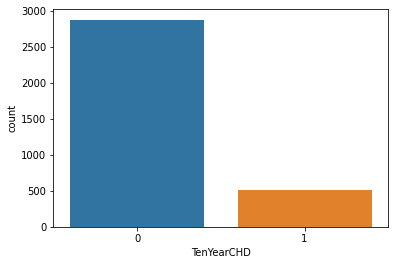

time: 310 ms (started: 2023-02-25 05:51:59 +00:00)


In [97]:
# Distribution of our dependent variable
sns.countplot(df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

I have used **bar chart** to represent dependent variable distribution. Vertical bar charts are useful **to compare different categorical or discrete variables** as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

I can clearly observe how the TenYeadCHD column is **imbalanced**. Very few observations(***less than 500***) are highlighting that people are prone to CHD. In order to run our Machine Learning models efficiently, I have to make sure that the data is balanced. For this I have used ***SMOTE*** later on.

#### **Chart - 2: Distibution of Numerical Features**

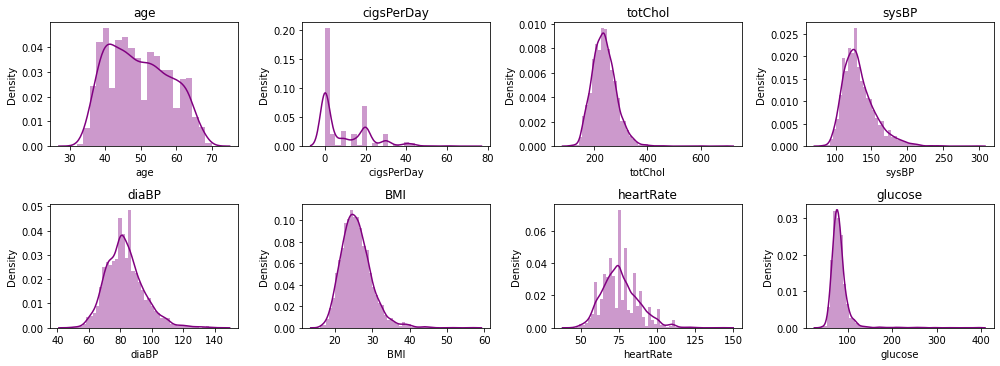

time: 4.17 s (started: 2023-02-25 05:51:59 +00:00)


In [98]:
# Chart - 2 visualization code
# Making distribution plot for Numerical features for checking the skewness.

n=1
plt.figure(figsize=(14,30))
for i in numerical_columns:
  plt.subplot(12,4,n)
  n= n+1
  sns.distplot(df[i],color='purple')
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

I chose the **distplot** as I wanted to check the distribution of numerical features.

##### 2. What is/are the insight(s) found from the chart?

Here, from the above distribution plot of numerical features, I observed that a few of the features like totChol, sysBP, BMI and glucose are ***slightly right skewed***.


*   Most of the **glucose** values are **less than 150**.
*   Almost 90% of **totChol** values are **between 50 to 400**.






#### **Chart - 3: Distibution of Categorical Features**

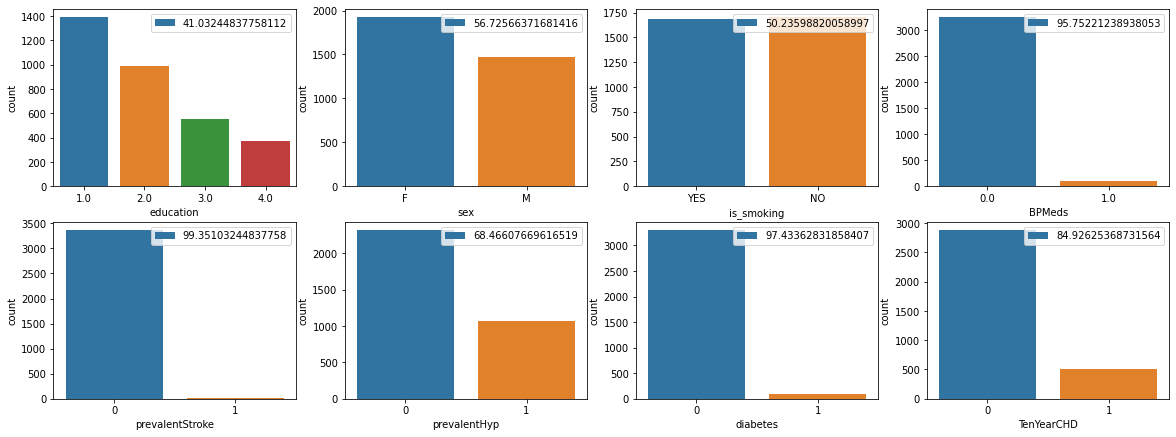

time: 1.13 s (started: 2023-02-25 05:52:03 +00:00)


In [99]:
# Chart - 3 visualization code
plt.figure(figsize=(20,15))
for i,j in enumerate(categorical_columns):
  plt.subplot(4,4,i+1)
  sns.countplot(df[j])
  plt.legend(df[j].value_counts()*100/len(df[j]))
plt.show()

##### 1. Why did you pick the specific chart?

I have chosen the **countplot** to visualise how each variable is distributed. 

##### 2. What is/are the insight(s) found from the chart?



*  **Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.** 
*  **There are more female patients( aorund 56%) compared to male patients.**
*  **Almost half the patients are smokers.**
*  **Almost 100 patients under the study are undertaking blood pressure medication.**
* **Very few patients (less than 1%) under the study have experienced a stroke.** 
*   **Close to 1000 patients have hypertension and very few patients have diabetes.**





###**Bivariate Analysis**

Bivariate analysis is slightly more analytical than Univariate analysis. It aims to undertake comparisons between the two variables. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. Here in this case, I have analysed how different attributes are related to target variable.

#### **Chart - 4: Which gender is more prone to the coronary heart disease?**

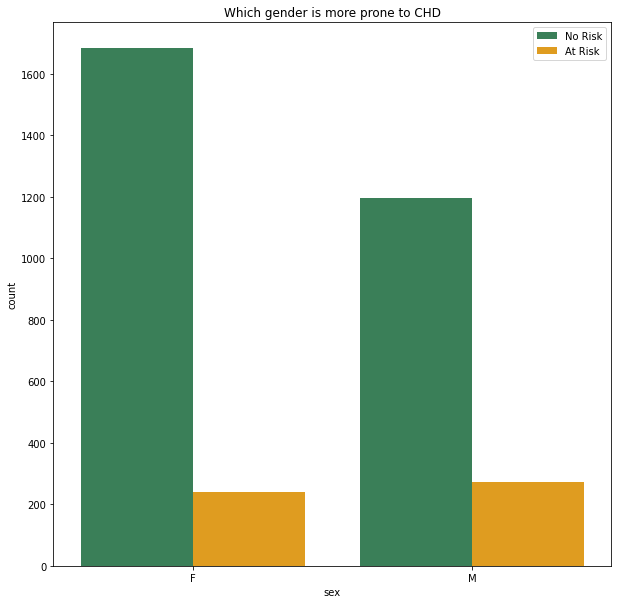

time: 236 ms (started: 2023-02-25 05:52:04 +00:00)


In [100]:
# Chart - 4 visualization code

my_palette = {0 : "seagreen" , 1 : 'orange'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

In order to visualise which gender is more prone to the coronary heart disease, I decided to plot the **countplot**.

##### 2. What is/are the insight(s) found from the chart?

Our dataset has limited information. Based on that information, ***both male and female have almost same probability*** of getting a CHD. But, this might not be the case for all so we can't and shouldn't generalise this.

#### **Chart - 5: Are smokers at more risk of coronary heart disease ??**

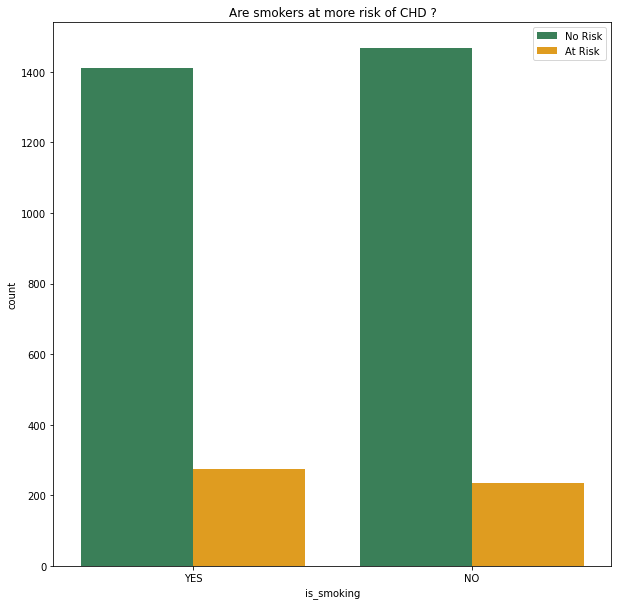

time: 215 ms (started: 2023-02-25 05:52:05 +00:00)


In [101]:
# Chart - 5 visualization code

my_palette = {0 : "seagreen" , 1 : 'orange'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

In order to visualise is smokers at more risk of coronary heart disease, I decided to plot the **countplot**.

##### 2. What is/are the insight(s) found from the chart?

Here we can easily observe that persons with smoking habit are **slightly more prone** to the CHD. Though the difference isn't much, we can say that smoking leads to the CHD.

#### **Chart - 6: What is the frequency of smoking across genders?**

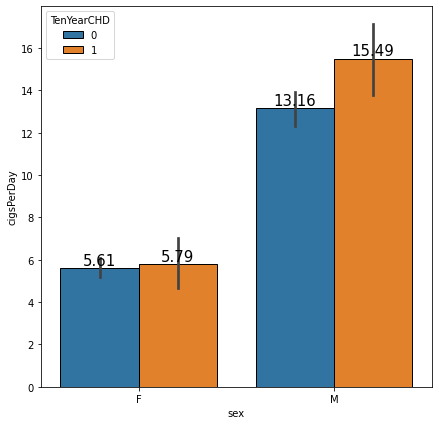

time: 419 ms (started: 2023-02-25 05:52:05 +00:00)


In [102]:
# Chart - 6 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

To visualise the frequency of smoking across the given genders, I decided to plot the **barplot**.

##### 2. What is/are the insight(s) found from the chart?

We can say that although the entries by females are higher than males but the **number of smokers are more in males** and hence they are more likely to be exposed to the CHD.

#### **Chart - 7: Which Age group is more vulnerable to coronary heart disease ?**

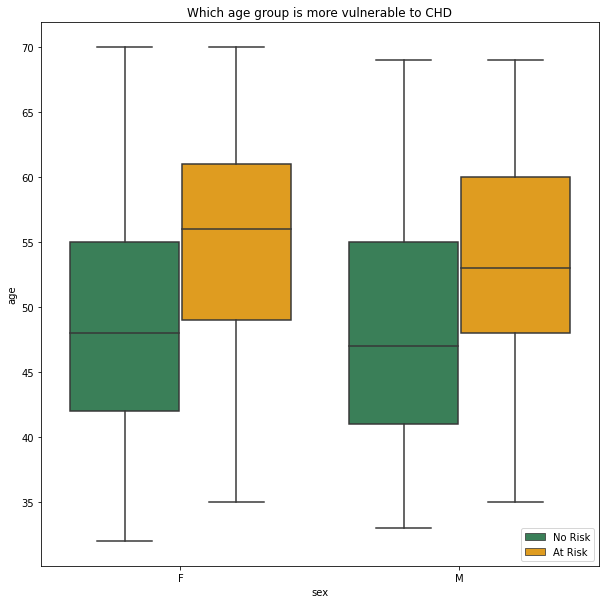

time: 466 ms (started: 2023-02-25 05:52:05 +00:00)


In [103]:
# Chart - 7 visualization code

plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which age group is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

In order to visualise the age group which is more vulnerable to CHD, I picked the **boxplot**.

##### 2. What is/are the insight(s) found from the chart?




*  For **Females**, age group of **age 49 to age 61** is more prone to the CHD.
*  For **Males**, age group of **age 48 to age 59** is more prone to the CHD.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is very useful insight for **Insurance Companies** as it proves that as human body ages risk of cardio vascular issues increases, this information can be leveraged by insurance companies **to spread awareness** in young population that if the start the policy early their future will be safe, and premium will also be less as they will live for more no of years. 

#### **Chart - 8: Whether a person who suffered a stroke earlier more prone to CHD?**



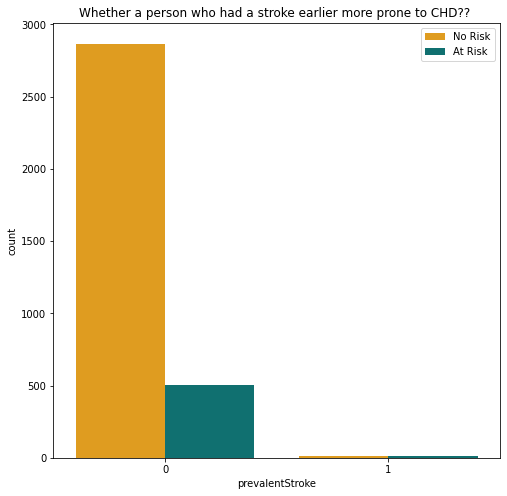

time: 211 ms (started: 2023-02-25 05:52:06 +00:00)


In [104]:
# Chart - 8 visualization code

plt.figure(figsize = (8,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

I chose the **countplot** to identify if a person with stroke history is more prone to the CHD or not.

##### 2. What is/are the insight(s) found from the chart?

Here we can observe that, **surprisingly**, people with **no stroke history** are **more prone** to the CHD. However, as our sample set is very small, we can't generalise this claim.

#### **Chart - 9: Distribution of BMI vs Sex with respect to TenYearCHD**

Text(0.5, 1.0, 'Distributions of BMI Vs Sex with TenYearCHD ')

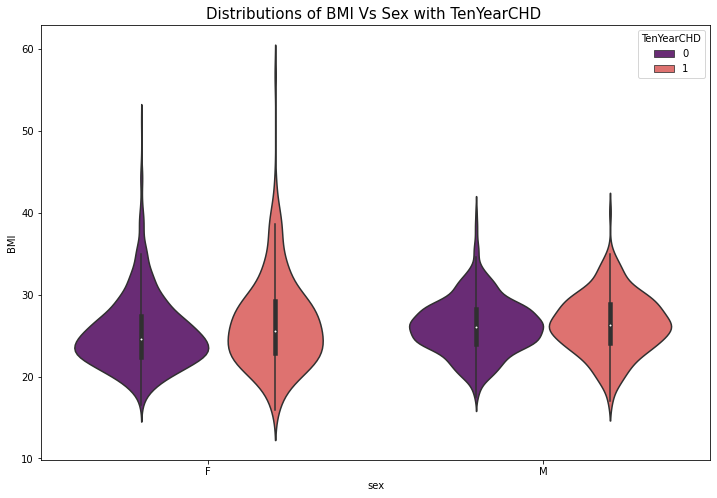

time: 395 ms (started: 2023-02-25 05:52:06 +00:00)


In [105]:
# Chart - 9 visualization code
#plotting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="sex", y='BMI',hue="TenYearCHD",palette = 'magma')
plt.title("Distributions of BMI Vs Sex with TenYearCHD ",fontsize=15)

##### 1. Why did you pick the specific chart?

To compare two different attributes with the target variable at the same time, I chose the **violinplot**. In this case, BMI vs Sex are compared with the TenYearCHD.

##### 2. What is/are the insight(s) found from the chart?

In this above plot, we can say that the range of **female BMI is more than the male BMI** that leads to overweight. So, female CHD is more than male CHD in our dataset.

#### **Chart - 10: Distribution of Glucose vs Sex with respect to TenYearCHD**

Text(0.5, 1.0, 'Distribution of Glucose vs Sex with respect to TenYearCHD ')

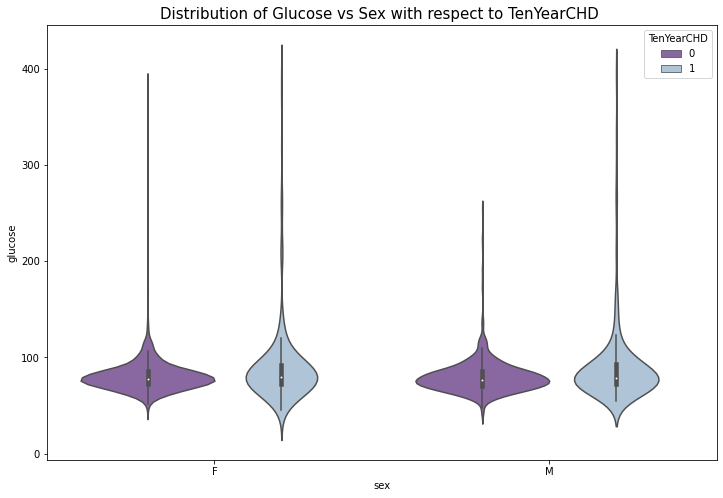

time: 348 ms (started: 2023-02-25 05:52:07 +00:00)


In [106]:
# Chart - 10 visualization code

#plotting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="sex", y='glucose',hue="TenYearCHD",palette = 'BuPu_r')
plt.title("Distribution of Glucose vs Sex with respect to TenYearCHD ",fontsize=15)

##### 1. Why did you pick the specific chart?

To compare two different attributes with the target variable at the same time, I chose the **violinplot**. In this case, Glucose vs Sex are compared with the TenYearCHD.

##### 2. What is/are the insight(s) found from the chart?

In the above violin plot, we can observe that **male with CHD has higher glucose level than female with CHD**. Most of the men with CHD are having glucose level **less than 150**.

###**Multivariate Analysis**

Multivariate analysis or plots are designed to reveal the relationship among several variables/attributes simulataneously. It considers more than one factor of independent variables that influence the variability of dependent variables, and hence the conclusion drawn is more accurate, more realistic and nearer to the real-life situation.

#### **Chart - 11 - Correlation Heatmap**

<AxesSubplot:>

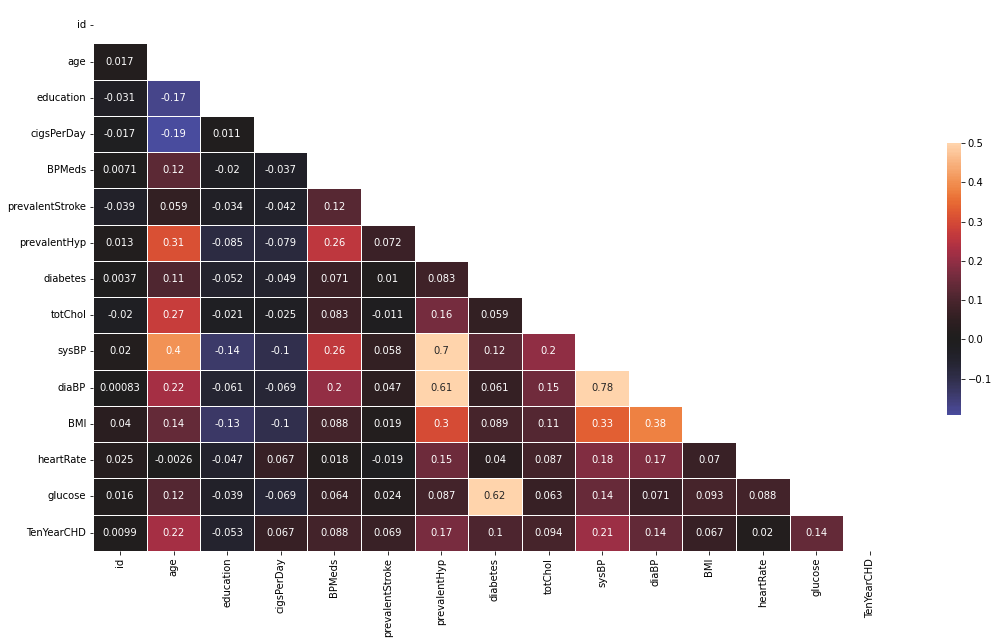

time: 3.08 s (started: 2023-02-25 05:52:16 +00:00)


In [107]:
# Correlation Heatmap visualization code
corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, vmax=.5, center=0, annot=True, linewidths=1.0, cbar_kws={"shrink": .5})

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the **strength of relationships between numerical variables**. They are used to understand which variables are related to each other and the strength of this relationship. So **to visualise how dependent and independent variables are related** with each other, I chose the **correlation heatmap**.

##### 2. What is/are the insight(s) found from the chart?


*   The correlation value between **Age and TenYearCHD** is **0.22** which highlights positive relationship. ***So with the increase in age, the person is more prone to the CHD.*** 
*   Since the **education and TenYearCHD** are negatively correlated**(-0.053)**, the difference in education does not necessarily indicated CHD.

*   **Diabetes and TenYearCHD** are positively related with **0.1**. That indicates that ***person with diabetes is more prone*** to the CHD than the person who is non-diabitic.
*   Relationship of **sysBP(0.21) and diaBP(0.14)** with the TenYearCHD is clearly highlighting that ***person with the BP problem is more prone*** to the CHD in longer duration.






#### **Chart - 12 - Pair Plot**

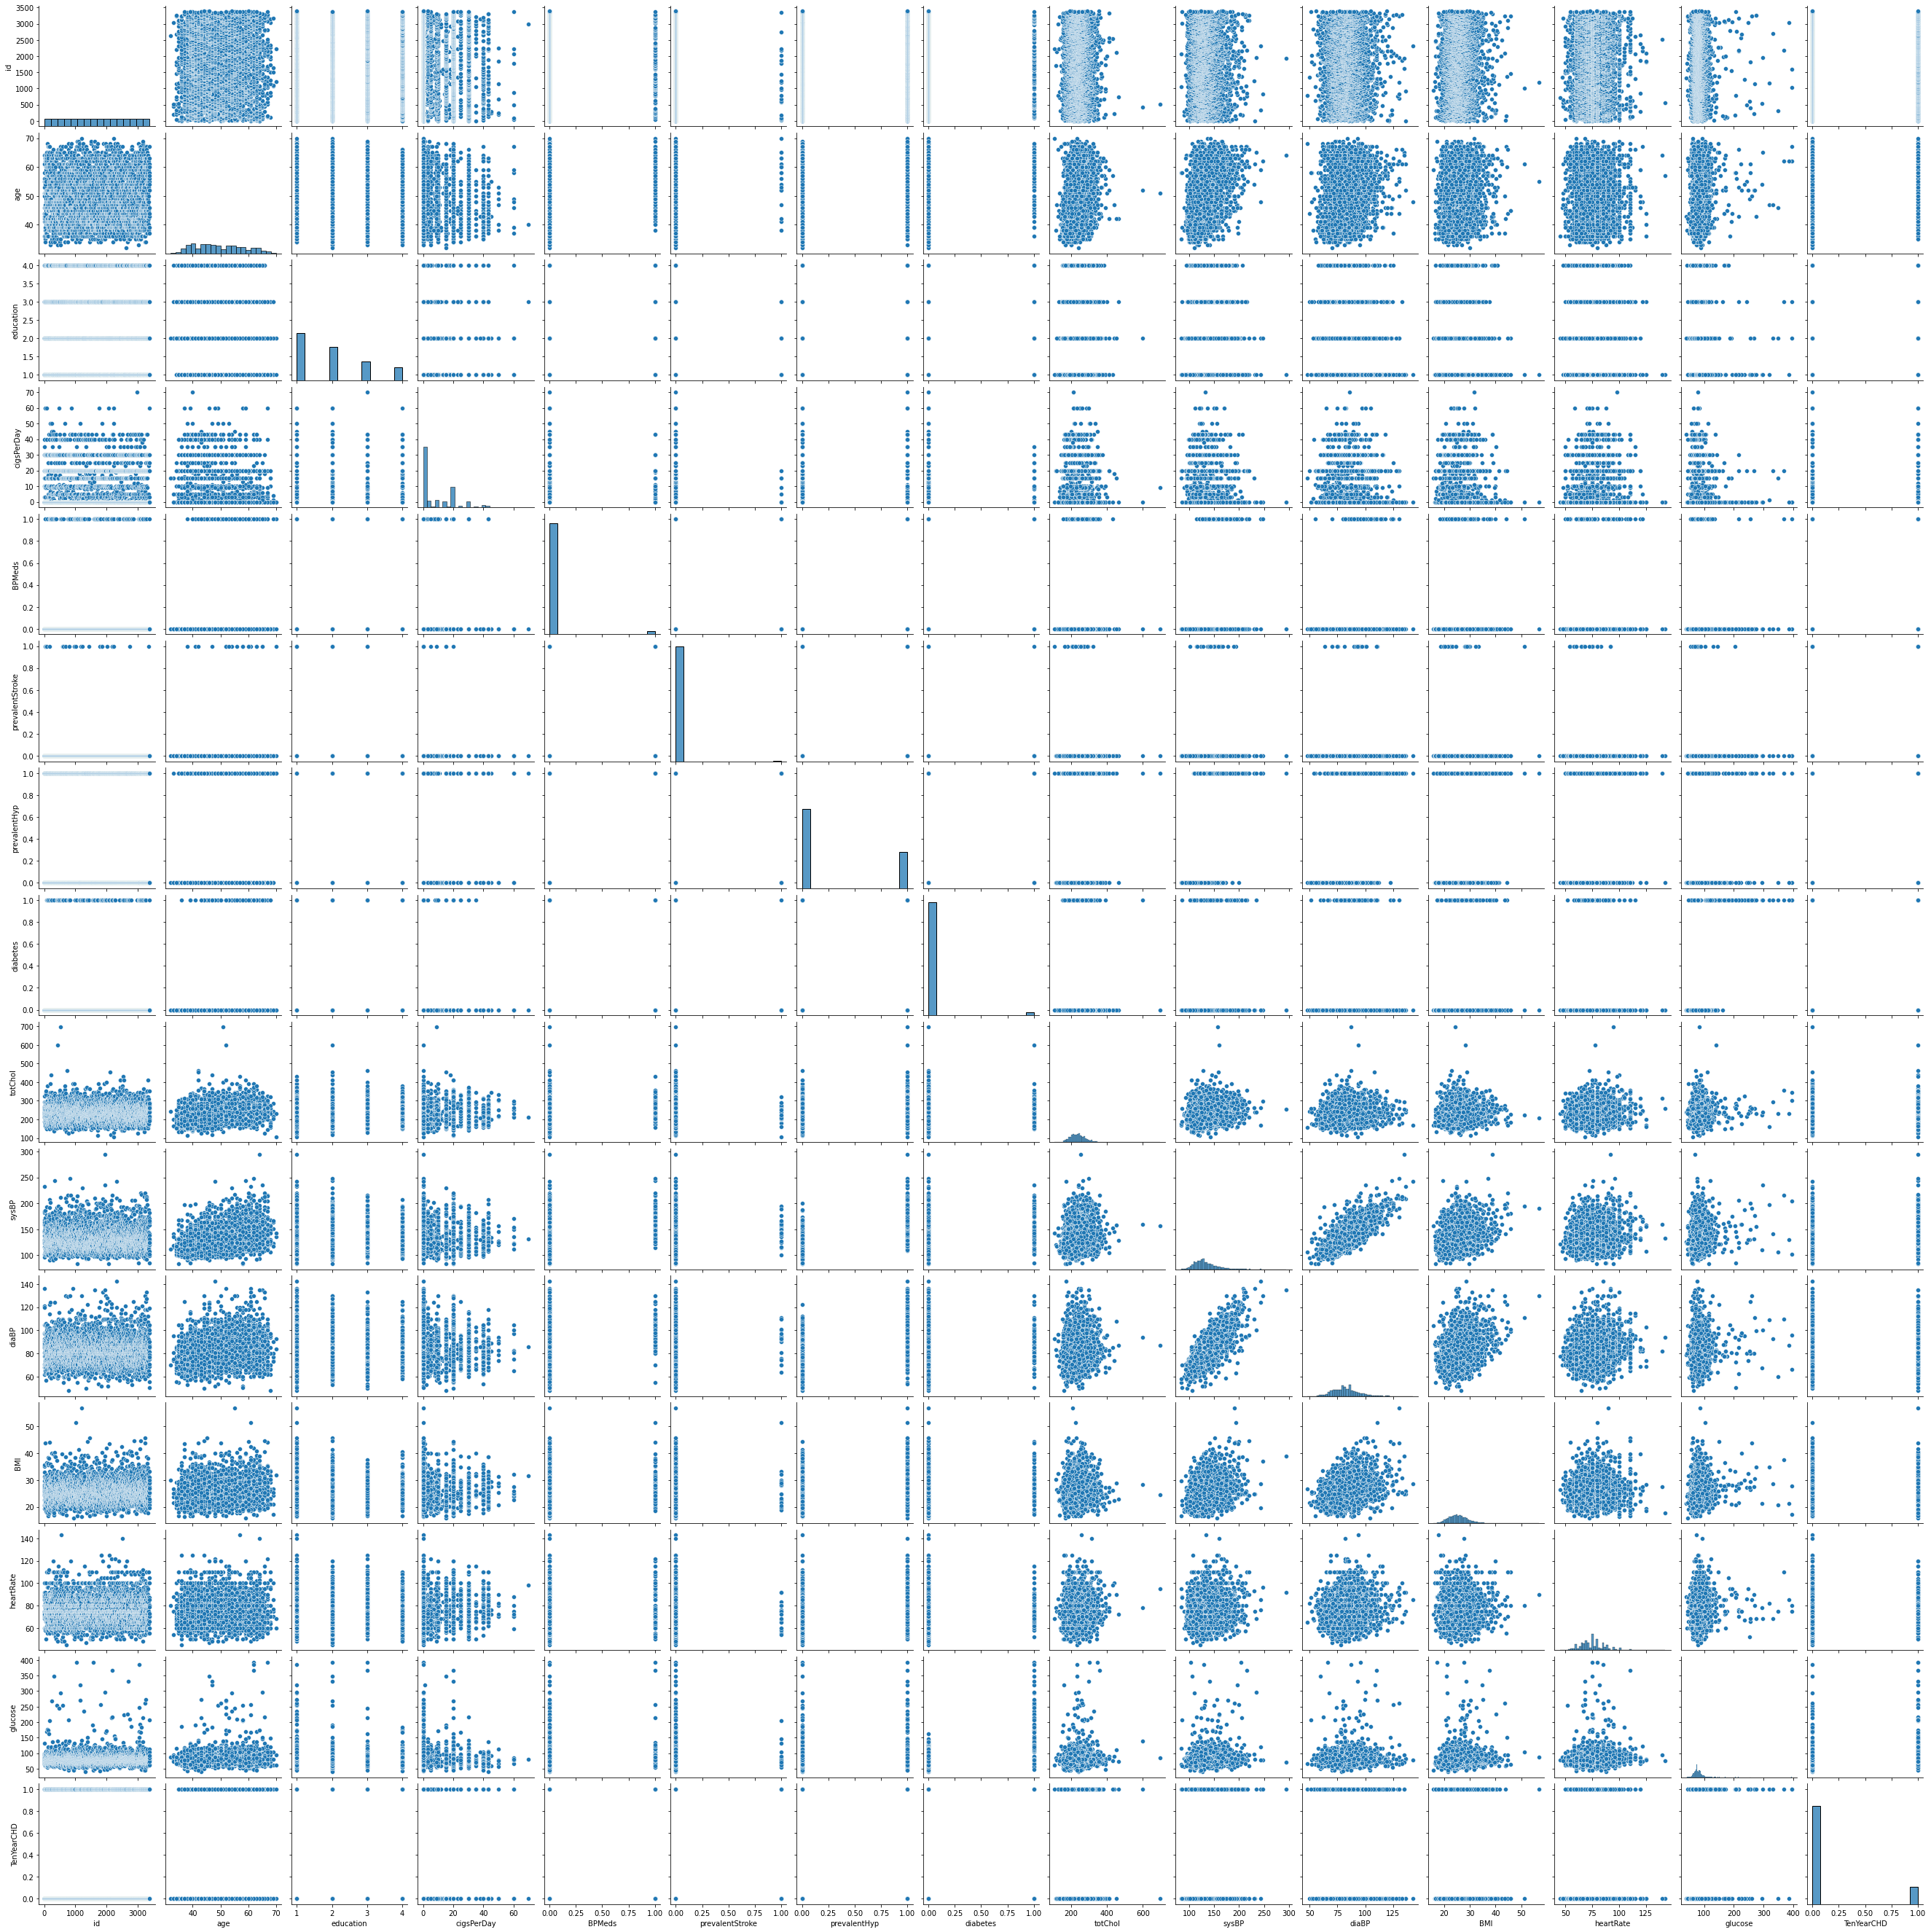

time: 1min 53s (started: 2023-02-25 05:52:55 +00:00)


In [108]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

The Pairplot allows us to **plot pairwise relationships** between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?



*   **SysBP and DiaBP** both share a ***linear relationship*** i.e change in one imposes a change in another.
*   **TotChol** is scattered throughout the age column with the ***maximum around 700*** which is pretty high.

*   For the most patients, **glucose** level is ***less than 120***. It is also negatively correlated with the cigsPerDay count. 
*   Education is almost **evenly distributed** among the four categories.





## ***5. Hypothesis Testing***

*The process of hypothesis testing is to draw inferences or some conclusion about the overall population or data by conducting some statistical tests on a sample. Hypothesis testing is done to confirm our observation about the population using sample data, within the desired error level. Through hypothesis testing, we can determine whether we have enough statistical evidence to conclude if the hypothesis about the population is true or not.*


In this case, I have tested 3 hypotheses given below:


**First Case**:



> ***Null Hypothesis*** - There is no relation between age and TenYearCHD


> ***Alternate Hypothesis*** - There is a relationship between age and TenYearCHD


---


**Second Case**:


> ***Null Hypothesis*** - There is no relation between prevalentHyp and TenYearCHD


> ***Alternate Hypothesis*** - There is a relation between prevalentHyp and TenYearCHD


---



**Third Case**: 



> ***Null Hypothesis*** - There is no relation between heartRate and TenYearCHD


> ***Alternate Hypothesis*** - There is a relation between heartRate and TenYearCHDSales

### **Hypothetical Statement - 1**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - There is no relation between age and TenYearCHD

**Alternate Hypothesis** - There is a relationship between age and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [109]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["age"].sample(n=150, random_state=0)
second_sample = df["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.229, p = 0.00
Rejected Null Hypothesis
time: 20.5 ms (started: 2023-02-25 05:54:49 +00:00)


##### Which statistical test have you done to obtain P-Value?

I have used **Pearson Correlation Test** along with **Pearson Correlation coefficient** value. Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two  variables. It is known as the best method of measuring the association between variables of interest because it is based on the **method of covariance**.

##### Why did you choose the specific statistical test?

Since I have to check linear correlation between the two variables, **Pearson's Correlation constant** is the best way. It's value ranges from **-1 to 1** indicating how positively or negatively both the variables are related. **Value ‘0’** specifies that there is **no relation** between the two variables. A value **greater than ‘0’** indicates a **positive relationship** between two variables where an increase in the value of one variable increases the value of another variable. Value **less than ‘0’** indicates a **negative relationship** between two variables where an increase in the value of one decreases the value of another variable.

As in our case, the value of coefficient comes out to be **0** indicating that age and TenYearCHD are positively correlated. Hence we can **reject** the hypothesis.

### **Hypothetical Statement - 2**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - There is no relation between prevalentHyp and TenYearCHD

**Alternate Hypothesis** - There is a relation between prevalentHyp and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["prevalentHyp"].sample(n=150, random_state=0)
second_sample = df["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.223, p = 0.01
Rejected Null Hypothesis
time: 14.8 ms (started: 2023-02-25 05:54:49 +00:00)


##### Which statistical test have you done to obtain P-Value?

I have used **Pearson Correlation Test** along with **Pearson Correlation coefficient** value. Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two  variables. It is known as the best method of measuring the association between variables of interest because it is based on the **method of covariance**.

##### Why did you choose the specific statistical test?

Since I have to check linear correlation between the two variables, **Pearson's Correlation constant** is the best way. It's value ranges from **-1 to 1** indicating how positively or negatively both the variables are related. **Value ‘0’** specifies that there is **no relation** between the two variables. A value **greater than ‘0’** indicates a **positive relationship** between two variables where an increase in the value of one variable increases the value of another variable. Value **less than ‘0’** indicates a **negative relationship** between two variables where an increase in the value of one decreases the value of another variable.


As in our case, the value of coefficient comes out to be **0.01** indicating that prevalentHyp and TenYearCHD are positively correlated. Hence we can **reject** the hypothesis.

### **Hypothetical Statement - 3**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - There is no relation between heartRate and TenYearCHD

**Alternate Hypothesis** - There is a relation between heartRate and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["heartRate"].sample(n=150, random_state=0)
second_sample = df["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.030, p = 0.71
Accept Null Hypothesis
time: 14.7 ms (started: 2023-02-25 05:54:49 +00:00)


##### Which statistical test have you done to obtain P-Value?

I have used **Pearson Correlation Test** along with **Pearson Correlation coefficient** value. Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two  variables. It is known as the best method of measuring the association between variables of interest because it is based on the **method of covariance**.

##### Why did you choose the specific statistical test?

Since I have to check linear correlation between the two variables, **Pearson's Correlation constant** is the best way. It's value ranges from **-1 to 1** indicating how positively or negatively both the variables are related. **Value ‘0’** specifies that there is **no relation** between the two variables. A value **greater than ‘0’** indicates a **positive relationship** between two variables where an increase in the value of one variable increases the value of another variable. Value **less than ‘0’** indicates a **negative relationship** between two variables where an increase in the value of one decreases the value of another variable.


As in our case, the value of coefficient comes out to be **0.71** indicating that heartRate and TenYearCHD are sparsely correlated. Hence we can **accept** the hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

*In order to create more accurate Machine learning models, feature engineering & data pre-processing is a vital step. It consists of four main steps: Feature Creation, Transformations, Feature Extraction, and Feature Selection. Effective feature engineering is based on sound knowledge of the business problem and the available data sources.*

### **1. Handling Missing Values**

*Handling the missing values is one of the greatest challenges faced by analysts, because making the right decision on how to handle it generates robust data models.*


Let us look at different ways of imputing the missing values

1.Deleting Rows

2.Replacing With Mean/Median/Mode

3.Assigning An Unique Category 

Since the given dataset is not very big and we have just **3390 rows**, we ***can't drop rows with null values***. We will fill them with appropriate options:


1.   **Education and BPMeds** are categorial columns and hence we will use **'Mode'** to treat the null values in them.
2.   **CigsPerDay, totChol, BMI, heartRate and glucose** are continuous columns and hence **'Median'**  would be the most approapriate way to replace the null values.



In [112]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

time: 3.93 ms (started: 2023-02-25 05:54:49 +00:00)


In [113]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = df, columns = ['education','BPMeds'])

time: 4.93 ms (started: 2023-02-25 05:54:49 +00:00)


In [114]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

time: 1.52 ms (started: 2023-02-25 05:54:49 +00:00)


In [115]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = df, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

time: 11.3 ms (started: 2023-02-25 05:54:49 +00:00)


In [116]:
# Checking for null values after treating the null values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 26.4 ms (started: 2023-02-25 05:54:49 +00:00)


****All null values of the dataset have been successfully treated!!****

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we have seen earlier, **glucose and education** have the most significant null values which can majorly affect our model building process and can also affect the predictions later. Also, this dataset is from ***medical domain*** so removing/ignoring such large null values could be risky. Hence, I have **treated the null values** in order to make our data more wholesome. 
 

> **Education** and **BPMeds** are categorial columns and hence I have used '**Mode**' to treat the null values in them.


> **CigsPerDay, totChol, BMI, heartRate and glucose** are continuous columns and hence I have used '**Median**' to treat the null values in them.






### **2.Treating Mis-filled Data**

While exploring the dataset, **I observed that at few places, data was mis-filled**. In the **'is_smoking'** attritude, even if the person is **not smoking** any cigarettes, some of the observations have been classified as **'Yes'**. So let's change such observations to **'No'**. 

In [117]:
# No cigarettes smoked though the smoking column is yes
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)].head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422  422   55        1.0   F        YES         0.0     0.0                0   
466  466   45        3.0   M        YES         0.0     0.0                0   
469  469   42        1.0   M        YES         0.0     0.0                0   
491  491   61        1.0   F        YES         0.0     0.0                0   
538  538   41        1.0   F        YES         0.0     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
422             1         0    213.0  163.0   91.0  28.66       69.0     66.0   
466             1         0    170.0  145.5   99.0  26.74       83.0     85.0   
469             0         0    196.0  123.0   73.0  22.06       66.0     78.0   
491             1         0    356.0  168.0   98.0  27.30      103.0    106.0   
538             0         0    171.0  135.0   82.5  24.35       79.0     82.0   

     TenYearCHD  
422           0  
466           0  
469           0  
491           0  
538           0

time: 56.5 ms (started: 2023-02-25 05:54:49 +00:00)


In [118]:
# Correcting the 'is_smoking' column to 'NO' where no cigarettes are smoked.
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

time: 15.5 ms (started: 2023-02-25 05:54:49 +00:00)


In [119]:
#Rechecking the data

df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

time: 54.4 ms (started: 2023-02-25 05:54:49 +00:00)


### **3. Handling Outliers**

*Outliers are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations. To ensure that the trained model generalizes well, it's important to detect and remove/treat these outliers.*

**First of all, let's visualise the outliers**

<AxesSubplot:>

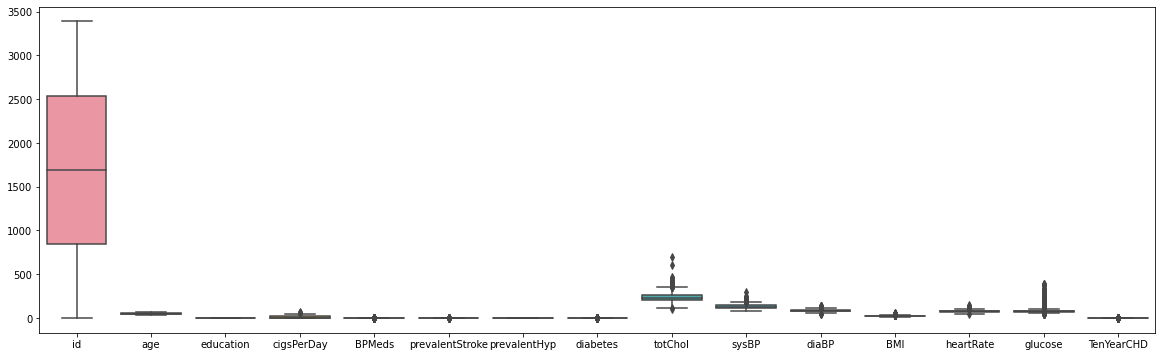

time: 1.21 s (started: 2023-02-25 05:54:49 +00:00)


In [120]:
# Handling Outliers & Outlier treatments
# Boxplot for all columns
plt.figure(figsize=(20,6))
sns.boxplot(data=df)

Here the outliers are seen in the columns- **cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose**. Let's treat them using **Z score treatment** as it ensures that feature distributions have **mean = 0 and std = 1.**

In [121]:
# Handling Outliers & Outlier treatments
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

time: 3.3 ms (started: 2023-02-25 05:54:50 +00:00)


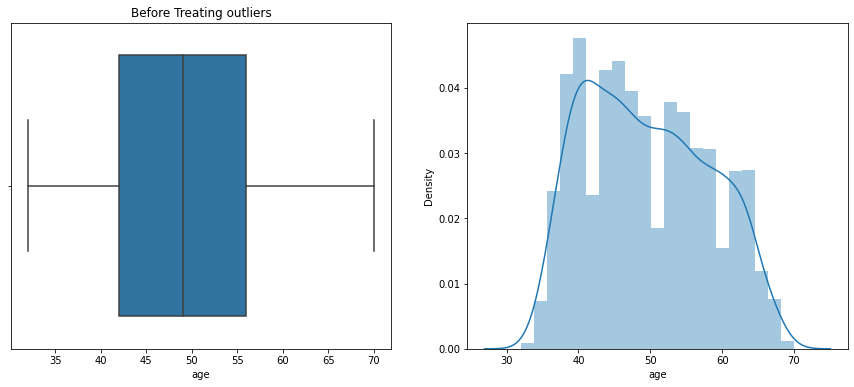

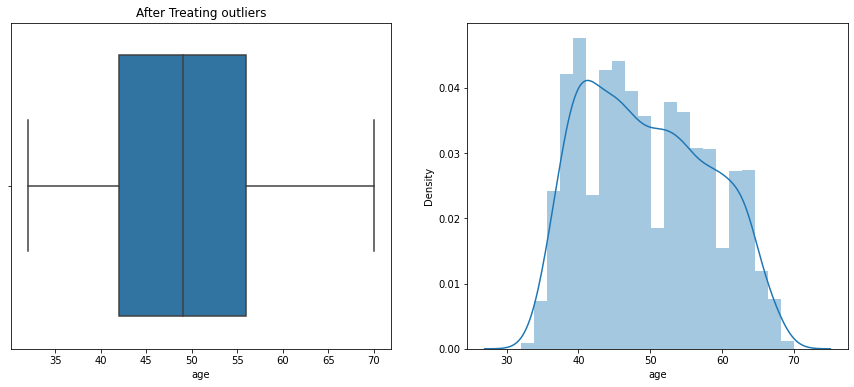

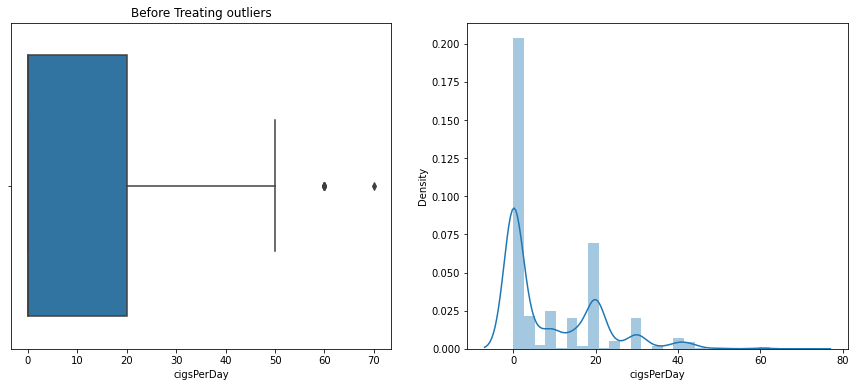

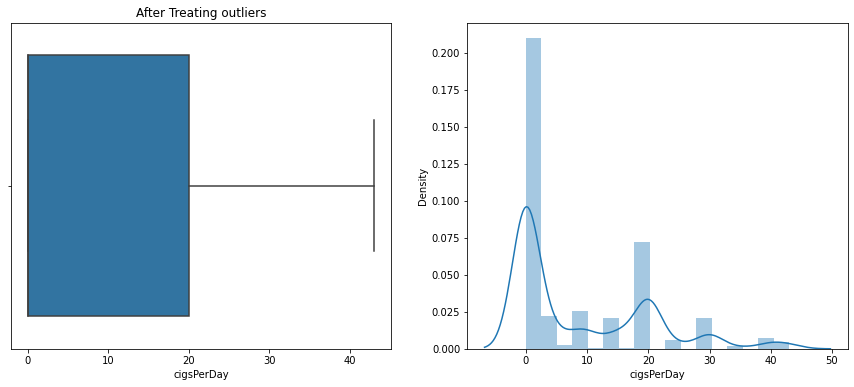

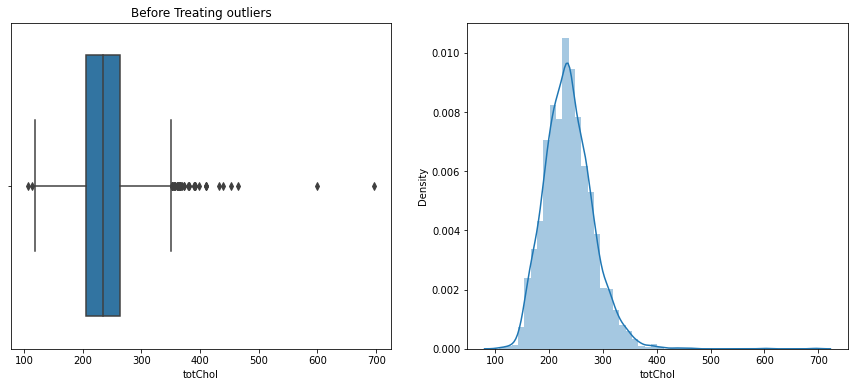

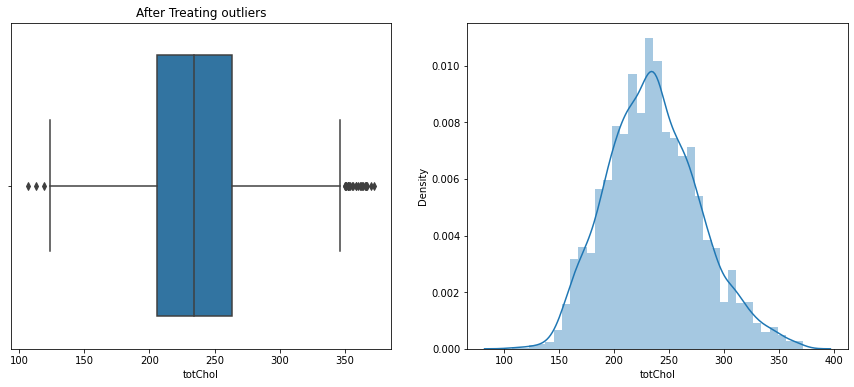

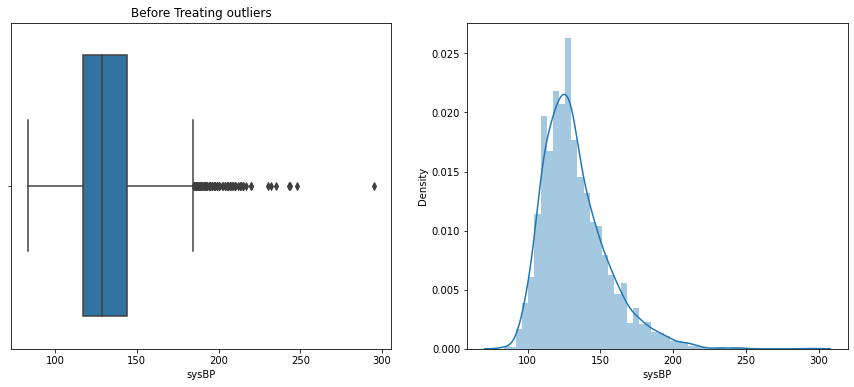

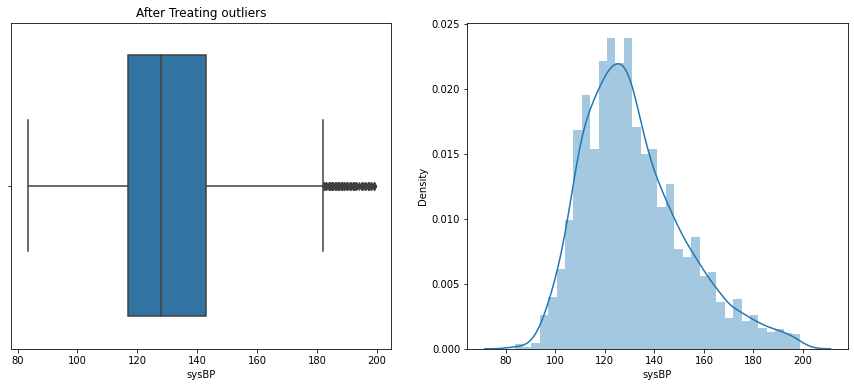

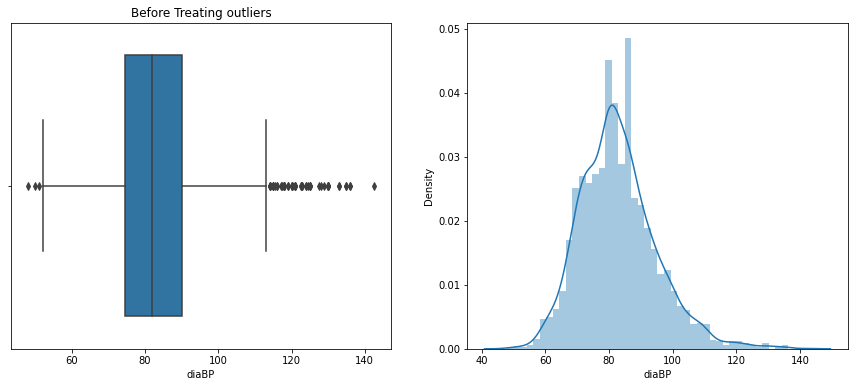

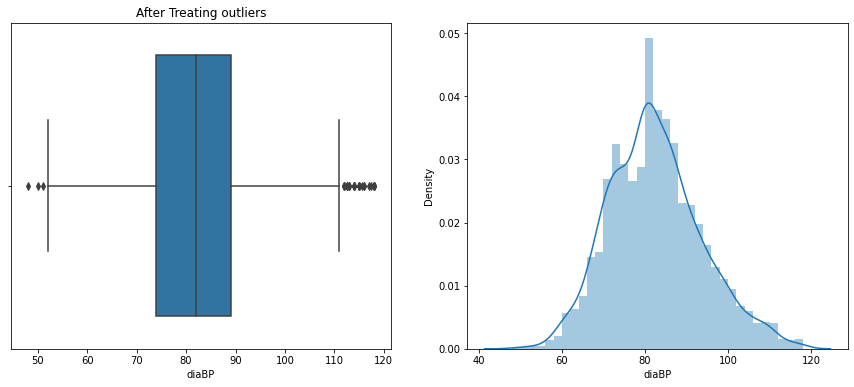

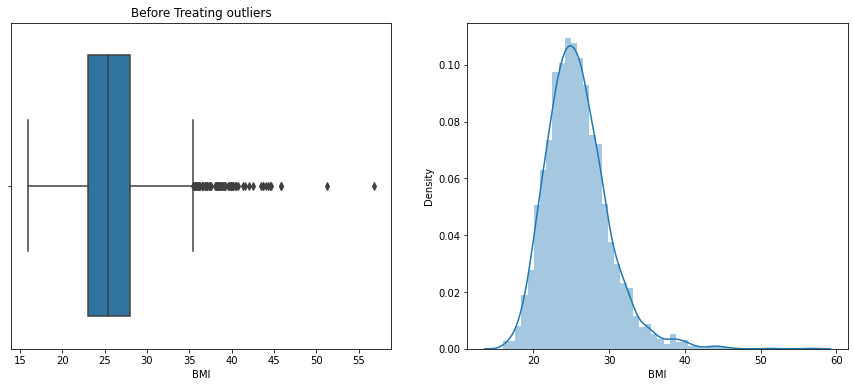

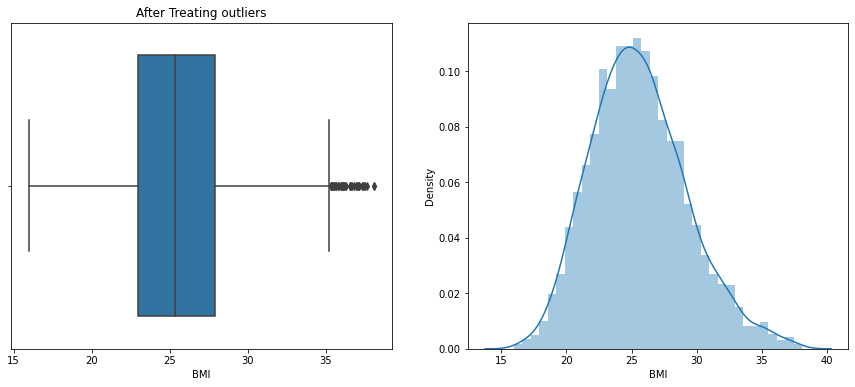

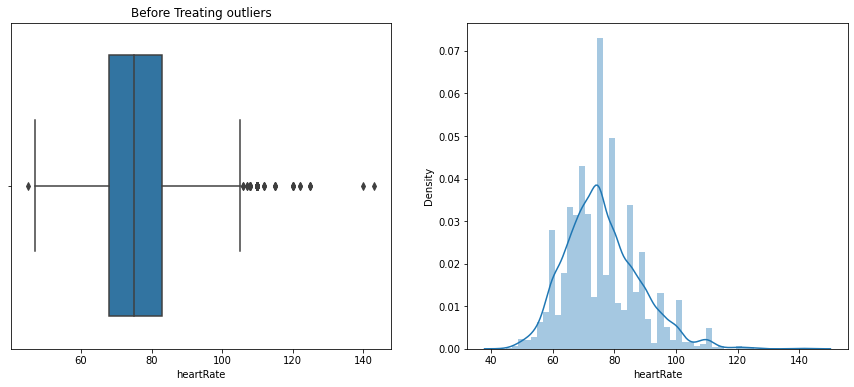

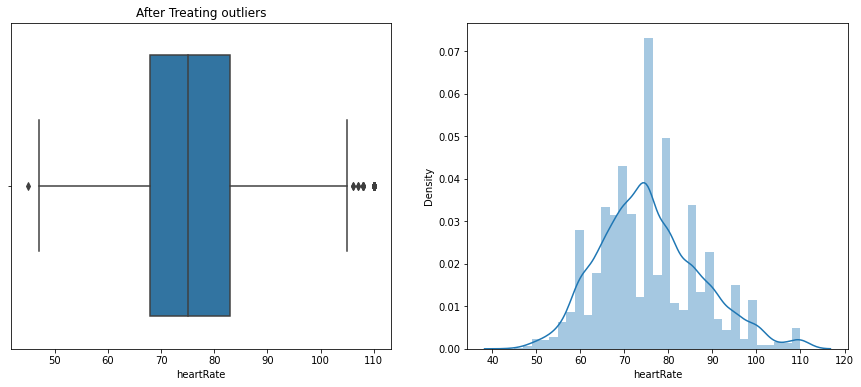

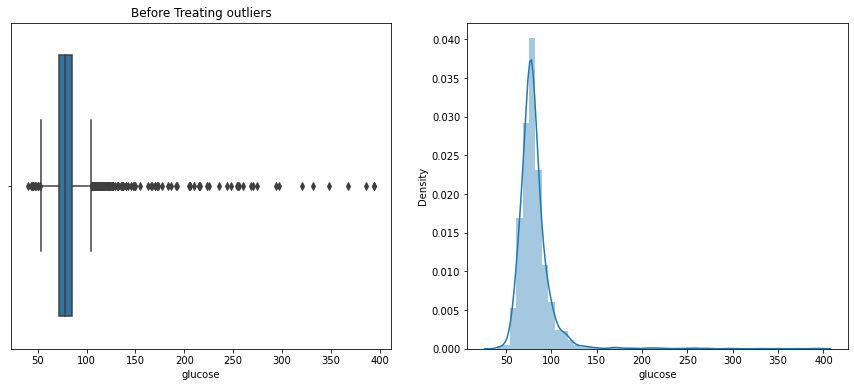

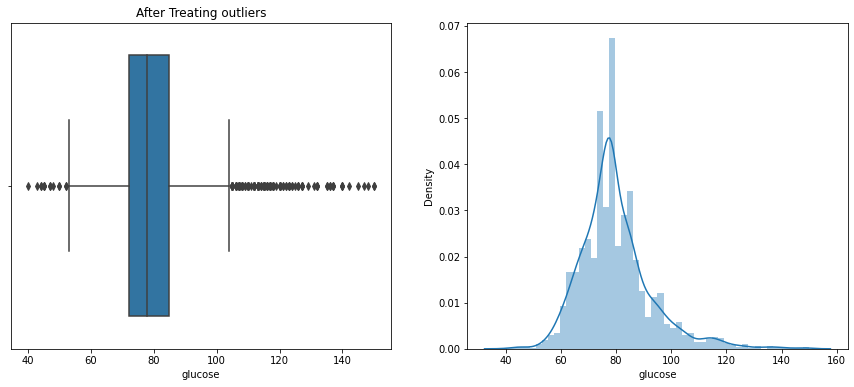

time: 14 s (started: 2023-02-25 05:54:50 +00:00)


In [122]:
for column in numerical_columns:
  remove_outlier(df,column)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used **Z score treatment** for treating outliers. Z score, also called as **Standard Score**, helps to understand if a data value is greater or smaller than mean. It also helps us to **identify how far away a particular datapoint is from the mean**. In other words, it tells us how many standard deviations away a data point is from the mean. 

Here in this particular dataset, **we are not supposed to remove all the outliers** as removing them could m**islead** the model and hence the predictions wouldn't be accurate for people. This is **very risky** and might expose the person to **unwanted fatality**. Hence treating the outliers with the help of **Z-score i.e Standard score** is the best way out.


### **4. Feature Manipulation**

*Feature manipulation is  addition, deletion, combination, mutation of our data set to improve machine learning model training, leading to better performance and greater accuracy. *

After exploring the dataset, we can perform following manipulations :



> **Addition of a new column:** We can add a new column **'pulse pressure'**, which is the difference between **systolic BP and diastolic BP**. We can then **drop** both the columns as pulse pressure gives us the required information.


> **Deletion of an existing column:** Since, the **cigsPerDay** column is already having the information about smokers and non-smokers, where we can define by the number of cigarettes consumed by patients.So, we will be **dropping the 'is_smoking' column**.


> **Mutation of an existing column:** Changing **cigsPerDay** into a **categorical** column.




In [123]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

time: 7.57 ms (started: 2023-02-25 05:55:04 +00:00)


In [124]:
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

time: 9.33 ms (started: 2023-02-25 05:55:04 +00:00)


In [125]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  TenYearCHD  \
0             0         0    221.0  25.38       90.0     80.0           1   
1             1         0    212.0  29.77       72.0     75.0           0   
2             0         0    250.0  20.35       88.0     94.0           0   
3             1         0    233.0  28.26       68.0     94.0           1   
4             0         0    241.0  26.42       70.0     77.0           0   

   pulsePressure  
0           63.0  
1           70.0  
2           45.0  
3           70.0  
4           51.5

time: 74.7 ms (started: 2023-02-25 05:55:05 +00:00)


In [126]:
# Dropping the is_smoking column
df.drop(['is_smoking'], axis = 1, inplace = True)

time: 8.11 ms (started: 2023-02-25 05:55:05 +00:00)


In [127]:
# Changing cigsperday into a categorical column
for i in range(len(df)):
  if df['cigsPerDay'][i] == 0:
    df['cigsPerDay'][i] = 'No Consumption'
  elif df['cigsPerDay'][i] > 0 and df['cigsPerDay'][i] < 20:
    df['cigsPerDay'][i] = 'Average Consumtion'
  else:
    df['cigsPerDay'][i] = 'High Consumption'

time: 186 ms (started: 2023-02-25 05:55:05 +00:00)


In [128]:
df.head()

id  age  education sex          cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F  Average Consumtion     0.0                0   
1   1   36        4.0   M      No Consumption     0.0                0   
2   2   46        1.0   F  Average Consumtion     0.0                0   
3   3   50        1.0   M    High Consumption     0.0                0   
4   4   64        1.0   F    High Consumption     0.0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  TenYearCHD  \
0             0         0    221.0  25.38       90.0     80.0           1   
1             1         0    212.0  29.77       72.0     75.0           0   
2             0         0    250.0  20.35       88.0     94.0           0   
3             1         0    233.0  28.26       68.0     94.0           1   
4             0         0    241.0  26.42       70.0     77.0           0   

   pulsePressure  
0           63.0  
1           70.0  
2           45.0  
3           70.0  
4           51.5

time: 63.1 ms (started: 2023-02-25 05:55:05 +00:00)


### **5. Categorical Encoding**

*Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Hence, for a better model training and prediction, I have encoded categorical feature values into binary values. A Binary Data is a data which uses two possible states or values i.e. 0 and 1. The (0 and 1) also referred to as (true and false)/(success and failure)/(yes and no) etc.*

In [129]:
# Encode your categorical columns
df=pd.get_dummies(df, columns=['sex', 'education', 'prevalentStroke', 'BPMeds', 'cigsPerDay'])
df.columns

Index(['id', 'age', 'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD', 'pulsePressure', 'sex_F', 'sex_M',
       'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0',
       'prevalentStroke_0', 'prevalentStroke_1', 'BPMeds_0.0', 'BPMeds_1.0',
       'cigsPerDay_Average Consumtion', 'cigsPerDay_High Consumption',
       'cigsPerDay_No Consumption'],
      dtype='object')

time: 53.8 ms (started: 2023-02-25 05:55:05 +00:00)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3390 non-null   int64  
 1   age                            3390 non-null   int64  
 2   prevalentHyp                   3390 non-null   int64  
 3   diabetes                       3390 non-null   int64  
 4   totChol                        3390 non-null   float64
 5   BMI                            3390 non-null   float64
 6   heartRate                      3390 non-null   float64
 7   glucose                        3390 non-null   float64
 8   TenYearCHD                     3390 non-null   int64  
 9   pulsePressure                  3390 non-null   float64
 10  sex_F                          3390 non-null   uint8  
 11  sex_M                          3390 non-null   uint8  
 12  education_1.0                  3390 non-null   u

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since our dataset have categorical variables, **one-hot encoding** comes in help because it transforms categorical data into numerical. It transforms **strings into numbers** so that we can apply our machine learning algorithms and predict the results.

### **6. Feature Selection**

*It is the method of reducing the input variable to model by using only relevant data and getting rid of noise in data. It is the process of choosing relevant features for our machine learning model based on the type of problem.*


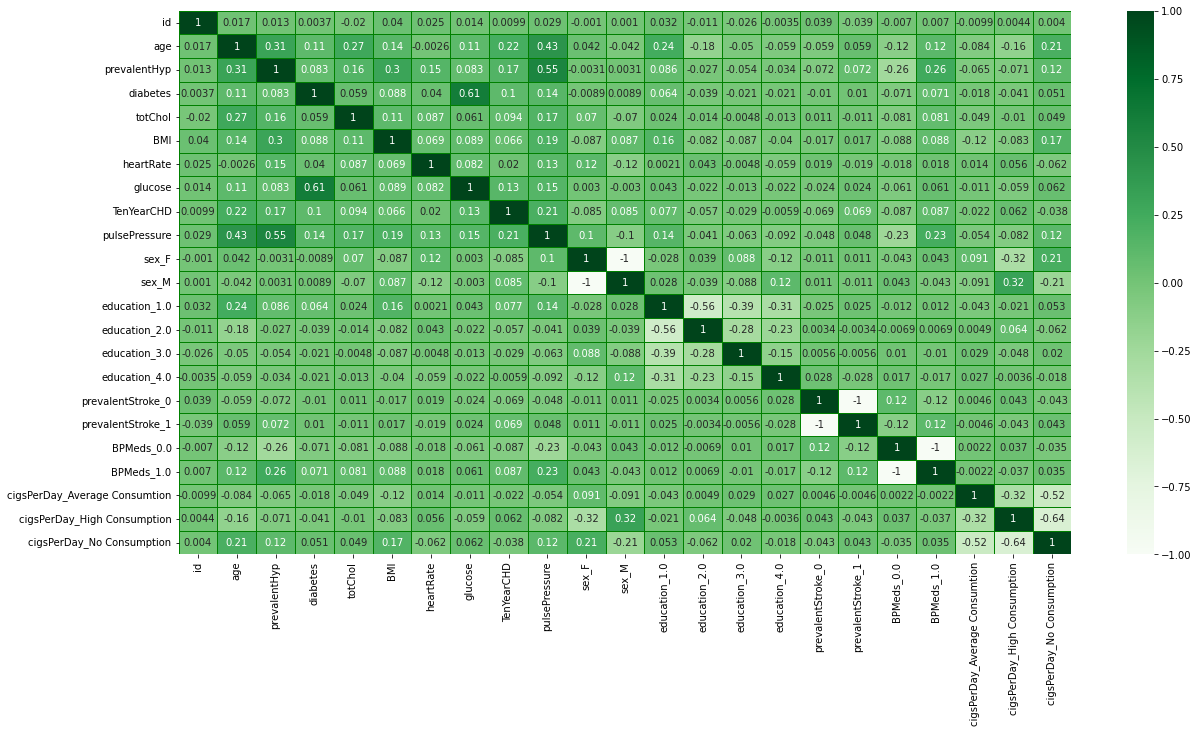

time: 6 s (started: 2023-02-25 05:55:05 +00:00)


In [131]:
plt.figure(figsize = (20, 10)) 
sns.heatmap(df.corr(), cmap='Greens',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

In [132]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

time: 1.67 ms (started: 2023-02-25 05:55:11 +00:00)


In [133]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ["TenYearCHD", "id"]]])

variables       VIF
0                             age  1.414198
1                    prevalentHyp  1.604473
2                        diabetes  1.604384
3                         totChol  1.111470
4                             BMI  1.176384
5                       heartRate  1.076231
6                         glucose  1.616894
7                   pulsePressure  1.675853
8                           sex_F       inf
9                           sex_M       inf
10                  education_1.0       inf
11                  education_2.0       inf
12                  education_3.0       inf
13                  education_4.0       inf
14              prevalentStroke_0       inf
15              prevalentStroke_1       inf
16                     BPMeds_0.0       inf
17                     BPMeds_1.0       inf
18  cigsPerDay_Average Consumtion       inf
19    cigsPerDay_High Consumption       inf
20      cigsPerDay_No Consumption       inf

time: 544 ms (started: 2023-02-25 05:55:11 +00:00)


In [134]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ["TenYearCHD", "id",'glucose','pulsePressure','totChol','heartRate','education_4.0','sex_F','prevalentStroke_0','BPMeds_0.0','cigsPerDay_Average Consumtion','cigsPerDay_No Consumption','BMI']]])

variables       VIF
0                          age  9.511313
1                 prevalentHyp  1.675319
2                     diabetes  1.043508
3                        sex_M  1.956949
4                education_1.0  4.675324
5                education_2.0  3.082078
6                education_3.0  2.216056
7            prevalentStroke_1  1.024510
8                   BPMeds_1.0  1.120993
9  cigsPerDay_High Consumption  1.569427

time: 216 ms (started: 2023-02-25 05:55:12 +00:00)


**Since all the VIF values are under 10, we can move ahead with the above features.**

##### What all feature selection methods have you used  and why?

In order to remove the **multicollinearity** between different features, I have used the **'Variance Inflation Factor'**. It measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. **High value of VIF indicates greater collinearity and low value indicates less collinearity**.

In [135]:
# Feature Selection
selected_features = ['age','prevalentHyp','diabetes','education_1.0','education_2.0','cigsPerDay_High Consumption','sex_M','BPMeds_1.0','prevalentStroke_1','education_3.0']
len(selected_features)

10

time: 9.52 ms (started: 2023-02-25 05:55:12 +00:00)


##### Which all features you found important and why?

After performing required manipulation, I have finalised a few features for our model training and testing. These are:
**'age', 'prevalentHyp', 'diabetes', 'education_1.0', 'education_2.0', 'cigsPerDay_High Consumption', 'sex_M', 'BPMeds_1.0', 'prevalentStroke_1', and 'education_3.0'**.


### **7. Data Splitting**

*In order to split the data and train ML models, I have used train test Split. The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets-train and test.*

In [136]:
# Splitting data
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

time: 1.12 ms (started: 2023-02-25 05:55:12 +00:00)


In [137]:
x=df[selected_features]
y=df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 

time: 9.1 ms (started: 2023-02-25 05:55:12 +00:00)


##### What data splitting ratio have you used and why? 

I have assigned **80% data into train set** and **20% into the test set**. Also, I have kept **random_state=0** so that I do not get different observations in every split.

### **8. Data Scaling**

*Data scaling is an important preprocessing step in machine learning that helps to ensure that all features are on a similar scale.*

In [138]:
# # Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

time: 2.2 ms (started: 2023-02-25 05:55:12 +00:00)


In [139]:
# Scaling data
scaler=MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

time: 11.5 ms (started: 2023-02-25 05:55:12 +00:00)


##### Which method have you used to scale you data and why?

I have used **MinMaxScaler** to scale the data as it **preserves the shape of the original distribution**. It doesn't meaningfully change the information embedded in the original data. Also, one of the important reason for selecting MinMaxScaler is because **it does not reduce the importance of outliers**. The **default range** for the feature returned by MinMaxScaler is **0 to 1**.

###**9. Handling Imbalanced Dataset**

*If any dataset is imbalanced, the model might favour the majority class. Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class i.e majority class.*

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


<AxesSubplot:ylabel='TenYearCHD'>

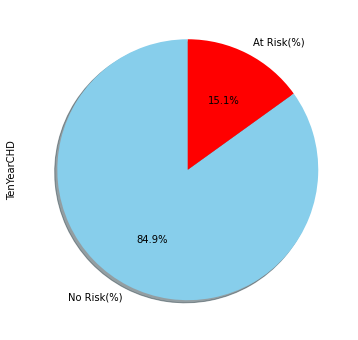

time: 175 ms (started: 2023-02-25 05:55:12 +00:00)


In [140]:
print(df.TenYearCHD.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No Risk(%)','At Risk(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

As we can see, one of the classes have very observations, there exits a **clear imbalance** in the classes. Hence, we will use **SMOTE to oversample** the classes which are in less number.

In [141]:
# Handling Imbalanced Dataset (If needed)
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2305
1     407
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2238
1    2238
Name: TenYearCHD, dtype: int64 

time: 140 ms (started: 2023-02-25 05:55:12 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In order to treat the **imbalance of the data(85:15)**, I have used **SMOTE (Synthetic Minority Over-sampling technique)**.



SMOTE is a data augmentation algorithm that **creates synthetic data points from raw data**. Hence it can be thought of as a more sophisticated version of **oversampling** or a specific data augmentation algorithm. It has the advantage of **not creating duplicate** data points, but rather synthetic data points that **differ slightly** from the original data points. In other words, SMOTE is a superior oversampling option.


## ***7. ML Model Implementation***

Following models have been used for predictions:-

* **Logistic Regression Classifier**

* **Random Forest Classifier**

* **Gaussian Naive Bayes Classifier**
*  **XG Boost Classifier**

*  **K-Nearest Neighbors Classifier**


### **ML Model - 1. Logistic Regression Classifier**

In [142]:
# ML Model - 1 Implementation
lgr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lgr.fit(x_smote, y_smote)
# Predict on the model
lgr_preds_prob = lgr.predict_proba(x_smote)[:,1]
lgr_preds= lgr.predict(x_smote)

time: 34.1 ms (started: 2023-02-25 05:55:12 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

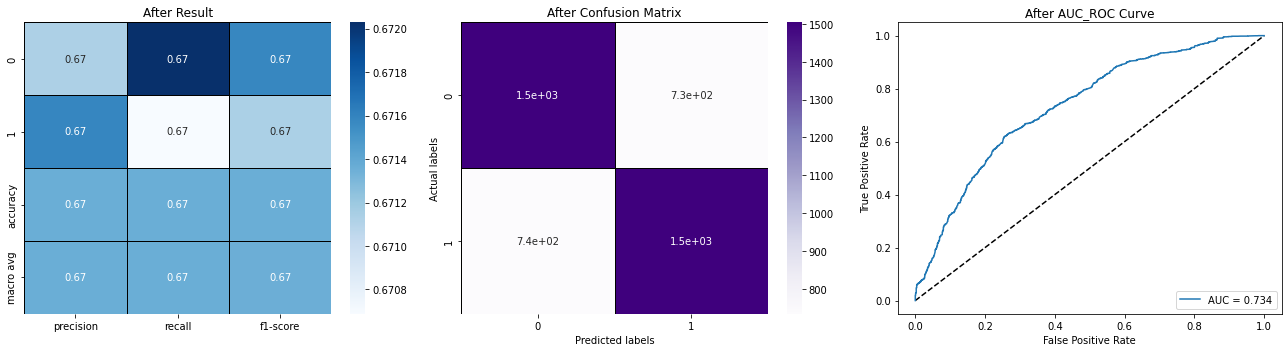

time: 1.2 s (started: 2023-02-25 05:55:12 +00:00)


In [143]:
# Visualizing evaluation Metric Score chart
result_1 = pd.DataFrame(classification_report(y_pred=lgr_preds, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, lgr_preds_prob)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_1.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=lgr_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

I started with the most basic classification model i.e **Logistic Regression**. By splitting the data into train and test sets, I trained model on the train dataset. After testing it on test dataset, I found out :



> **Recall = 0.67**

> **Precision = 0.67**



> **AUC = 0.734**



These are decent scores. **F1-score ranges between 0 and 1**. The closer it is to 1, the better the model. So I tried the **more complex models**.


### **ML Model - 2 Random Forest Classifier**

In [144]:
# ML Model - 1 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(x_smote, y_smote)
# Predict on the model
rfc_y_pred = rfc.predict(x_smote)
rfc_y_pred_proba = rfc.predict_proba(x_smote)[:,1]

time: 663 ms (started: 2023-02-25 05:55:14 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

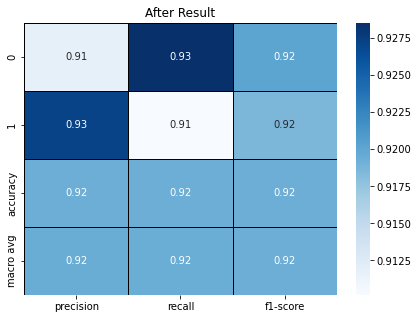

time: 357 ms (started: 2023-02-25 05:55:14 +00:00)


In [145]:
# Visualizing evaluation Metric Score chart
result_7 = pd.DataFrame(classification_report(y_pred=rfc_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_7.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [146]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_cv = RandomForestClassifier(random_state=2)

# GridSearch to find the best parameters
grid = {'n_estimators' : [100,300],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}
rfc_grid = GridSearchCV(rfc_cv, param_grid = grid, scoring = scoring, cv=5)
# Fit the Algorithm
rfc_grid.fit(x_smote, y_smote)
best_model = rfc_grid.best_estimator_

# Predict on the model
rfc_cv_y_pred = best_model.predict(x_smote)
rfc_cv_y_pred_proba = best_model.predict_proba(x_smote)[:,1]

time: 1min 31s (started: 2023-02-25 05:55:15 +00:00)


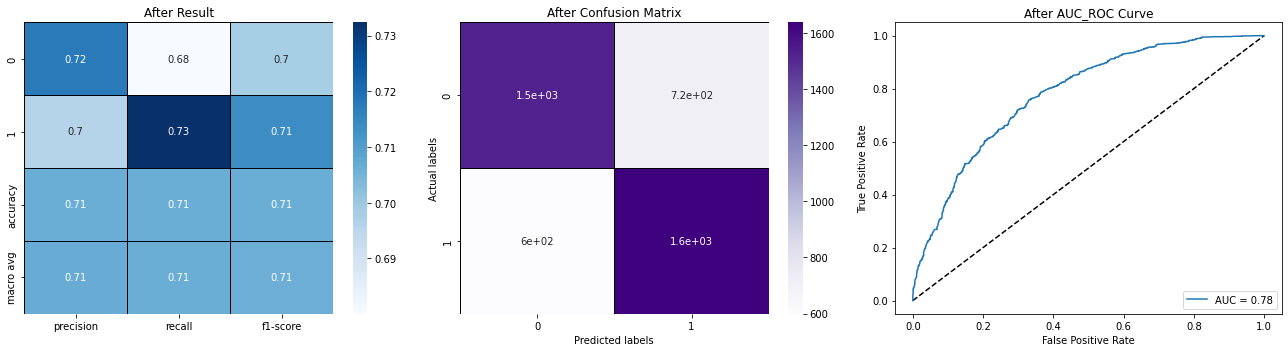

time: 1.85 s (started: 2023-02-25 05:56:46 +00:00)


In [147]:
# Visualizing evaluation Metric Score chart
result_8= pd.DataFrame(classification_report(y_pred=rfc_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, rfc_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_8.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=rfc_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Performance of any model significantly depends on the **value of hyperparameters**. Also there is no way to know in advance the best values for hyperparameters so ideally, **we need to try all possible values** to know the optimal values. Doing this **manually** could take a considerable amount of time and resources. Thus **GridSearchCV is used to automate the tuning of hyperparameters**. It is a technique for finding the **optimal parameter** values from a given set of parameters in a grid. It's essentially **a cross-validation technique**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the parameters and cross-validations, I could see that the results were dropped :

**Before CV and Hyperparameter optimization**:

> **Recall = 0.92**

> **Precision = 0.92**


---

**After CV and Hyperparameter optimization:**

> **Recall = 0.71**

> **Precision = 0.71**



**Random Forest Classifier** gave the best results **before** tuning but after the cross-validation, I could observe that **it was overfitting** and hence the **scores dropped after tuning** the parameters. Hence, in the quest of more good and accurate results, I **decided to try more models**.  


### **ML Model - 3 Gaussian Naive Bayes Classifier**

In [148]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_smote, y_smote)
# Predict on the model
nb_y_pred = nb.predict(x_smote)
nb_y_pred_proba = nb.predict_proba(x_smote)[:,1]

time: 11.1 ms (started: 2023-02-25 05:56:48 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

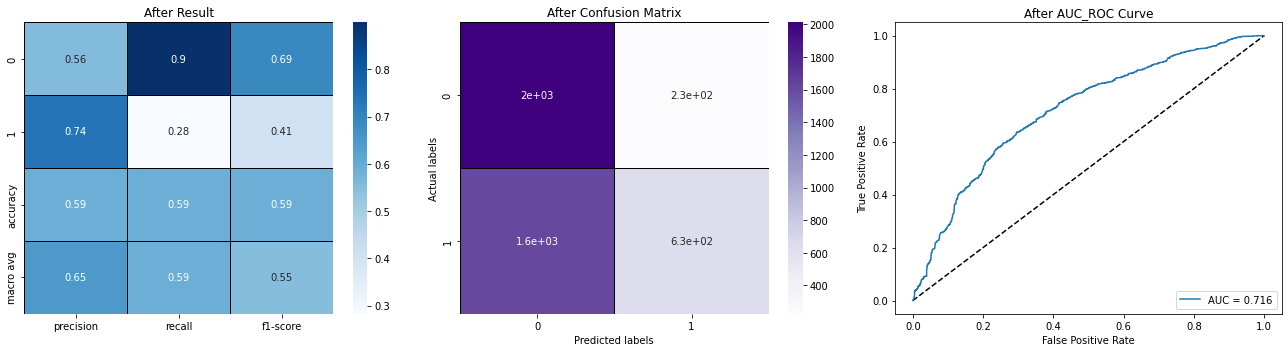

time: 2.06 s (started: 2023-02-25 05:56:48 +00:00)


In [149]:
# Visualizing evaluation Metric Score chart
result_4= pd.DataFrame(classification_report(y_pred=nb_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, nb_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_4.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=nb_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

After trying Gaussian Naive Bayes Classifier, I could see the results drastically decreasing:



> **Recall = 0.59**

> **F1 Score = 0.55**

> **AUC = 0.716**




### **ML Model - 4 XG Boost Classifier**

In [150]:
# ML Model - 1 Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_smote, y_smote)
# Predict on the model
xgb_y_pred = xgb.predict(x_smote)
xgb_y_pred_proba = xgb.predict_proba(x_smote)[:,1]

time: 339 ms (started: 2023-02-25 05:56:50 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

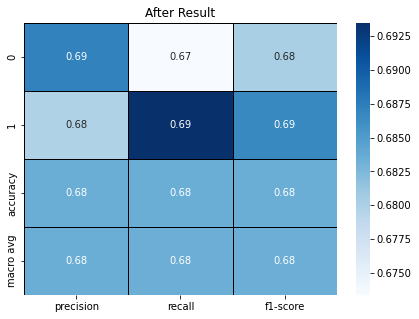

time: 525 ms (started: 2023-02-25 05:56:50 +00:00)


In [151]:
# Visualizing evaluation Metric Score chart
result_5 = pd.DataFrame(classification_report(y_pred=xgb_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_5.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [152]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}
xgb_cv= GridSearchCV(xgb, param_grid = grid, scoring = scoring, cv=5)

# Fit the Algorithm
xgb_cv.fit(x_smote, y_smote)
# Predict on the model
xgb_cv_y_pred = xgb_cv.predict(x_smote)
xgb_cv_y_pred_proba = xgb_cv.predict_proba(x_smote)[:,1]

time: 1min 43s (started: 2023-02-25 05:56:51 +00:00)


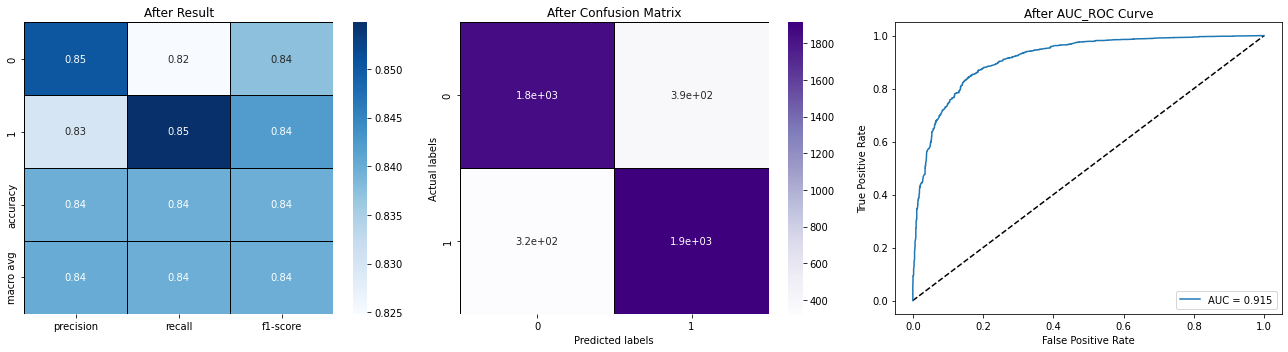

time: 1.71 s (started: 2023-02-25 05:58:34 +00:00)


In [153]:
# Visualizing evaluation Metric Score chart
result_6= pd.DataFrame(classification_report(y_pred=xgb_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, xgb_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_6.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=xgb_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Performance of any model significantly depends on the **value of hyperparameters**. Also there is no way to know in advance the best values for hyperparameters so ideally, **we need to try all possible values** to know the optimal values. Doing this **manually** could take a considerable amount of time and resources. Thus **GridSearchCV is used to automate the tuning of hyperparameters**. It is a technique for finding the **optimal parameter** values from a given set of parameters in a grid. It's essentially **a cross-validation technique**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**After tuning** the parameters and cross-validations, I could see that the results were **improved** :

**Before CV and Hyperparameter optimization:**

> **Recall = 0.68**

> **Precision = 0.68**


---

**After CV and Hyperparameter optimization:**

> **Recall = 0.84**

> **Precision = 0.84**

> **AUC = 0.915** 





**XG Boost Classifier** gave the best results **after** tuning and cross-validation. **Recall and precision of 0.84 is decent and AUC of 0.915 is pretty good.** But in the quest of more good and accurate results, I decided to **try more models**.  


### **ML Model - 5 K-Nearest Neighbors Classifier**

In [154]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(x_smote, y_smote)
# Predict on the model
knn_y_pred = knn.predict(x_smote)
knn_preds_prob = lgr.predict_proba(x_smote)[:,1]

time: 381 ms (started: 2023-02-25 05:58:36 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

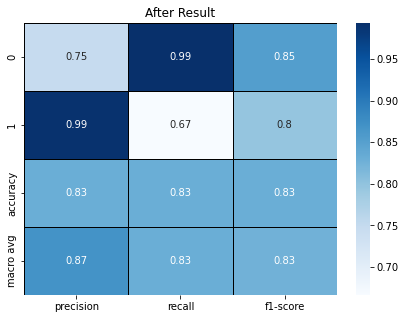

time: 571 ms (started: 2023-02-25 05:58:36 +00:00)


In [155]:
# Visualizing evaluation Metric Score chart
result_2 = pd.DataFrame(classification_report(y_pred=knn_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_2.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 
# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_smote, y_smote)
# Predict on the model
knn_cv_y_pred = knn_cv.predict(x_smote)
knn_y_pred_proba = knn_cv.predict_proba(x_smote)[:,1]

time: 17.6 s (started: 2023-02-25 05:58:37 +00:00)


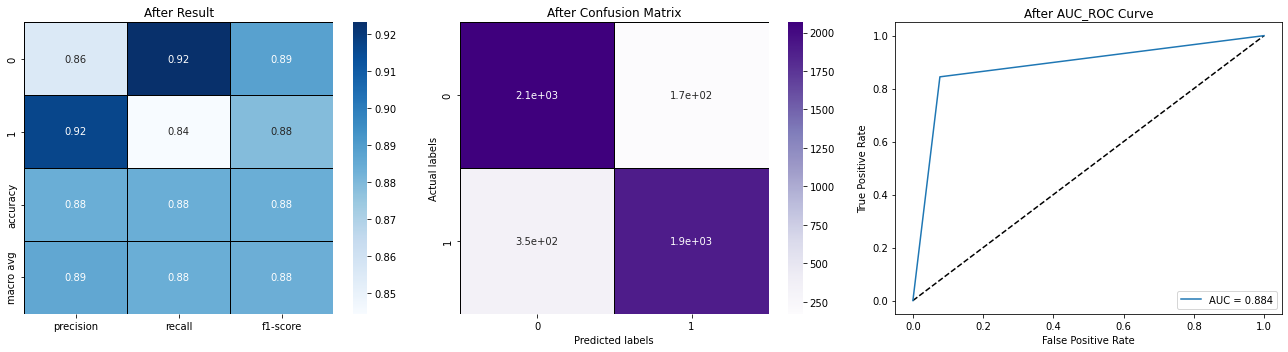

time: 1.1 s (started: 2023-02-25 05:58:55 +00:00)


In [157]:
# Visualizing evaluation Metric Score chart
result_3 = pd.DataFrame(classification_report(y_pred=knn_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, knn_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_3.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=knn_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Performance of any model significantly depends on the **value of hyperparameters**. Also there is no way to know in advance the best values for hyperparameters so ideally, **we need to try all possible values** to know the optimal values. Doing this **manually** could take a considerable amount of time and resources. Thus **GridSearchCV is used to automate the tuning of hyperparameters**. It is a technique for finding the **optimal parameter** values from a given set of parameters in a grid. It's essentially **a cross-validation technique**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**After tuning** the parameters and cross-validations, I could see that the results were **improved** :

**Before CV and Hyperparameter optimization:**

> **Recall = 0.83**

> **Precision = 0.83**


---

**After CV and Hyperparameter optimization:**

> **Recall = 0.88**

> **Precision = 0.88**

> **AUC = 0.884**





**K-Nearest Neighbors Classifier** gave the best results **both before and after** hyper-parameter tuning and cross-validation. **Recall and precision of 0.88 is decent and AUC of 0.884 is pretty good.** So I have decided the **kNN as the best model** for this particular dataset.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The dataset consists of **medical history** of various people and we were supposed to build a model which predicts if a person would suffer CHD. In this case, ***Overlooked Cases (False Negatives) are more costly than False Alarms (False Positive)***. It would be very fatal for the patient if the model fails to predict that he/she would suffer CHD **i.e we can observe that there is a high cost associated with False Negatives**. To deal with this very issue, I chose **'Recall'** as the **model metric** to select the best machine learning model.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?



**K-Nearest Neighbors Classifier** gave the best results **both before and after** hyper-parameter tuning and cross-validation. **Recall and precision of 0.88 is decent and AUC of 0.884 is pretty good.** So I have decided the **kNN as the best model** for this particular dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

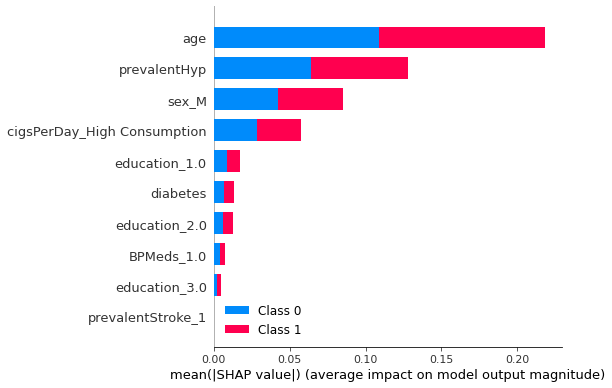

time: 2.55 s (started: 2023-02-25 05:58:56 +00:00)


In [158]:
# Creating instances of shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_smote)
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(x_smote, columns =['age','prevalentHyp','diabetes','education_1.0','education_2.0',
                                          'cigsPerDay_High Consumption','sex_M','BPMeds_1.0','prevalentStroke_1','education_3.0'])
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

As the ***SHAP Python module does not yet have specifically optimized algorithms for all types of algorithms( such as kNN)***, I have used **second best model i.e random forest classifier** to highlight the feature importance. 


As we can observe that **Age** is affecting our target variable the most. It is followed by **prevalentHyp, sex_M and cigsPerDay_High Consumption**. Other features are comparatively **contributing less** towards the prediction of target variable.

## ***Conclusions***

###***Conclusions drawn from EDA***

**Exploratory Data Analysis (EDA)** is an important step because it allows for the **initial investigation** of a dataset. It helps **to identify patterns, anomalies, and relationships** in the data, as well as to detect any potential issues such as **missing values or outliers**. Additionally, it is a good way **to understand the data**, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps **to guide the direction** of further analysis.



**EDA conclusions**:

> ***Our target varible distribution highllights that very few people from the given dataset (i.e less than 500) are prone to the CHD***.


> ***The risk of getting diagnosed with heart disease increases as age increases***.

* ***For Females, age group of age 49 to age 61 is more prone to the CHD***.
* ***For Males, age group of age 48 to age 59 is more prone to the CHD***.



> ***Although cigarette consumption is a major factor that causes CHDs, there isn't much difference for smokers and non-smokers***.

> ***Patients having Diabetes and cholesterol problems show a higher risk of CHDs. Our dataset highlights that around 61% of the diabetic population is at high risk***.

> ***Patients having high glucose levels are more prone to CHDs. From our dataset, most of the patients who suffer from CHDs tend to have glucose level as high as 150***.



> ***Patients with high BMI(Body Mass Index) are at more risk of getting diagnosed with CHDs***.



###***Conclusions drawn from ML Model Implementation***

**Predictions** of any ML model highly **impacts the business growth**. Before going for the model deployment, one should check how accurately the model is predicting and performing with the real life data. *Conclusions drawn from any model are very helpful to identify whether the model is good to go for deployment process or needs further refinement*.


**Project conclusions**:




> ***For this dataset, our target variable is "TenYearCHD" which determines, people having cardiovascular issue in the ten years of span.***



> ***I tried 5 different models for the predictions namely:***


*  ***Logistic Regression Classifier***



*   ***Random Forest Classifier***
*   ***Gaussian Naive Bayes Classifier***

*   ***XG Boost Classifier***
*  ***K-Nearest Neighbors Classifier***




> ***The dataset consists of medical history of various people and we were supposed to build a model which predicts if a person would suffer CHD. In this case, Overlooked Cases (False Negatives) are more costly than False Alarms (False Positive). It would be very fatal for the patient if the model fails to predict that he/she would suffer CHD i.e we can observe that there is a high cost associated with False Negatives. To deal with this very issue, I chose 'Recall' as the model metric to select the best machine learning model.***

> ***K-Nearest Neighbors Classifier gave the best results both before and after hyper-parameter tuning and cross-validation. Recall and precision of 0.88 is decent and AUC of 0.884 is pretty good. So I have decided the kNN as the best model for this particular dataset.***
















## ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***